<a href="https://colab.research.google.com/github/MarkLee7925/Heart-Classification-UCI/blob/main/heart-DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Heart Disease In Patient

## Data pre-processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [ ]:
# Load dataframe (df)
df = pd.read_csv('heart.csv')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(303, 13) (303,)


In [ ]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [ ]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Visualize data

#### Plot age distribution

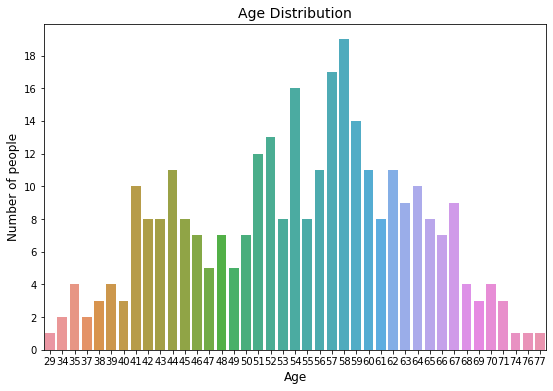

In [ ]:
plt.figure(figsize=(9, 6))
plt.yticks(np.arange(0, 20, 2))
age_dist = df['age']
sns.countplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

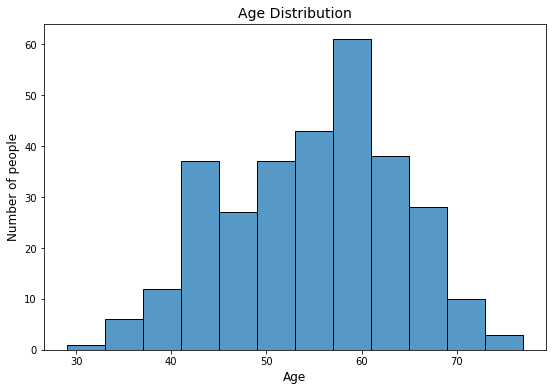

In [ ]:
plt.figure(figsize=(9, 6))
age_dist = df['age']
sns.histplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

#### Plot gender distribution

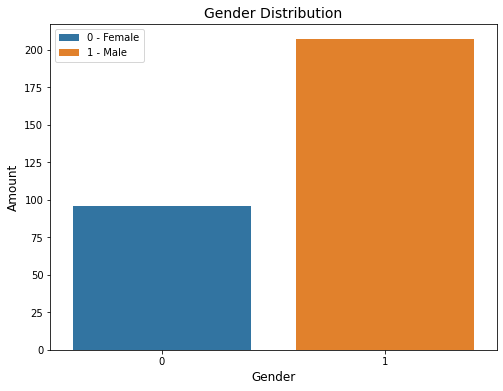

In [ ]:
plt.figure(figsize=(8, 6))
labels = ['0 - Female', '1 - Male']
gender_dist = df['sex']
gender_plot = sns.countplot(x=gender_dist, hue=df['sex'], dodge=False)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.legend(labels=labels, loc='upper left')
plt.show()

#### Gender distribution and Results

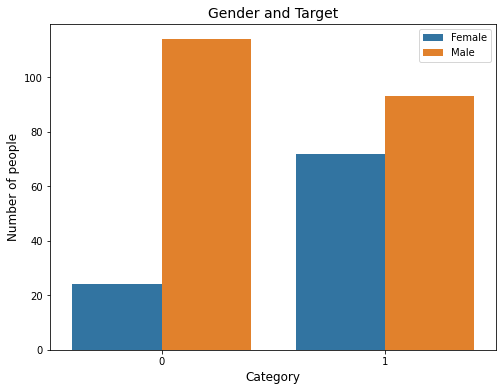

In [ ]:
labels = ['Female', 'Male']
plt.figure(figsize=(8, 6))
target = df['target']
sns.countplot(x=target, hue=df['sex'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Gender and Target', fontsize=14)
plt.legend(labels=labels)
plt.show()

###### **Category:**
0 - No Heart Disease\
1 - Heart Disease

#### Chest Pain Type and Cholesterol Level

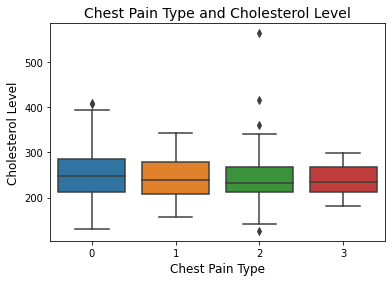

In [ ]:
x = df['cp']
y = df['chol']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
box_plot = sns.boxplot(x=x, y=y, data=df)
box_plot.set_xlabel("Chest Pain Type", fontsize=12)
box_plot.set_ylabel("Cholesterol Level", fontsize=12)
box_plot.set_title("Chest Pain Type and Cholesterol Level", fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 - Nontypical\
1 - Nonanginal\
2 - Asymptomatic\
3 - Typical

#### Chest pain and heart rate

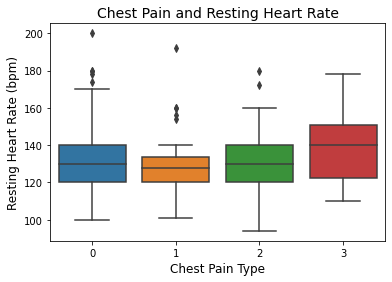

In [ ]:
x = df['cp']
y = df['trestbps']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
box_plot = sns.boxplot(x=x, y=y, data=df)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Resting Heart Rate (bpm)", fontsize=12)
plt.title("Chest Pain and Resting Heart Rate", fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 - Nontypical\
1 - Nonanginal\
2 - Asymptomatic\
3 - Typical

#### Age vs Cholesterol Level

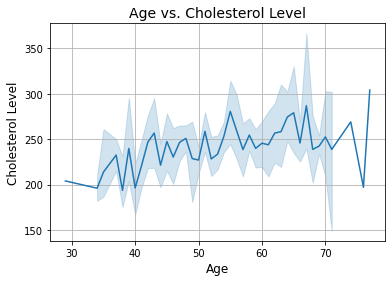

In [ ]:
x = df['age']
y = df['chol']
line_plot = sns.lineplot(x=x, y=y, data=df)
line_plot.set_xlabel("Age", fontsize=12)
line_plot.set_ylabel("Cholesterol Level", fontsize=12)
line_plot.set_title("Age vs. Cholesterol Level", fontsize=14)
plt.grid()
plt.show()

#### Age vs. Blood Sugar

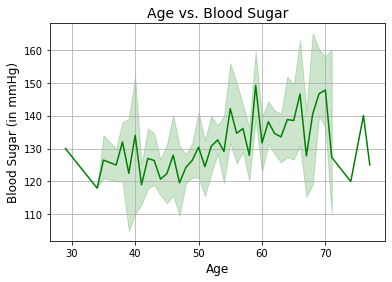

In [ ]:
x = df['age']
y = df['trestbps']
line_plot = sns.lineplot(x=x, y=y, data=df, color='green')
line_plot.set_xlabel("Age", fontsize=12)
line_plot.set_ylabel("Blood Sugar (in mmHg)", fontsize=12)
line_plot.set_title("Age vs. Blood Sugar", fontsize=14)
plt.grid()
plt.show()

## Define DNN model

Batch size = 32, Epochs = 150, k-Folds = 3


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Epoch 1/150
8/8 [==============================] - 1s 96ms/step - loss: 0.8650 - accuracy: 0.4710 - val_loss: 0.5962 - val_accuracy: 0.7377
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.8027 - accuracy: 0.5439 - val_loss: 0.5856 - val_accuracy: 0.7705
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7765 - accuracy: 0.5557 - val_loss: 0.5743 - val_accuracy: 0.7541
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6730 - accuracy: 0.6429 - val_loss: 0.5650 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6593 - accuracy: 0.6637 - val_loss: 0.5555 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7314 - accuracy: 0.6455 - val_loss: 0.5484 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7081 - accuracy: 0.5680 - val_loss: 0.5417 - val_accuracy: 0.7377
Epoch 8/150
8/8 [===

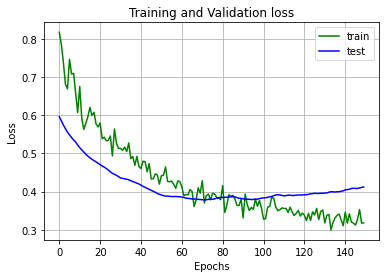

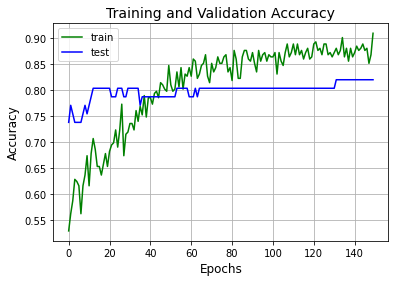

accuracy: 81.967%
Epoch 1/150
8/8 [==============================] - 1s 30ms/step - loss: 0.7459 - accuracy: 0.5209 - val_loss: 0.6718 - val_accuracy: 0.6393
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7355 - accuracy: 0.5440 - val_loss: 0.6462 - val_accuracy: 0.6721
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7673 - accuracy: 0.5499 - val_loss: 0.6190 - val_accuracy: 0.6885
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7361 - accuracy: 0.5351 - val_loss: 0.5975 - val_accuracy: 0.7049
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6284 - accuracy: 0.5999 - val_loss: 0.5812 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7008 - accuracy: 0.5552 - val_loss: 0.5665 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6312 - accuracy: 0.6157 - val_loss: 0.5535 - val_accuracy: 0.7869
Epo

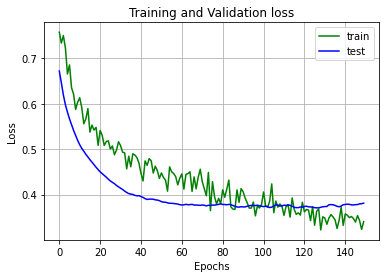

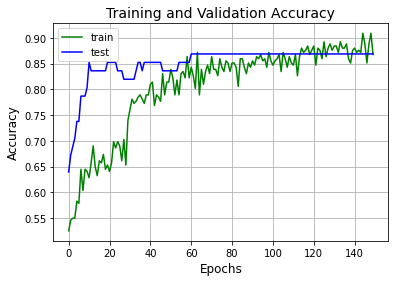

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.7135 - accuracy: 0.5478 - val_loss: 0.7096 - val_accuracy: 0.5574
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7387 - accuracy: 0.5284 - val_loss: 0.6944 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6835 - accuracy: 0.5289 - val_loss: 0.6792 - val_accuracy: 0.5902
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7151 - accuracy: 0.5452 - val_loss: 0.6640 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6355 - accuracy: 0.6327 - val_loss: 0.6501 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6443 - accuracy: 0.5567 - val_loss: 0.6378 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6345 - accuracy: 0.5971 - val_loss: 0.6274 - val_accuracy: 0.6721
Ep

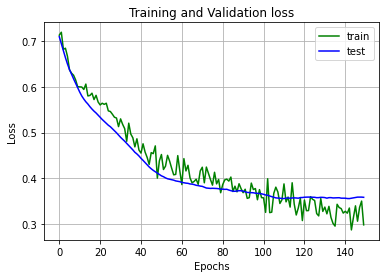

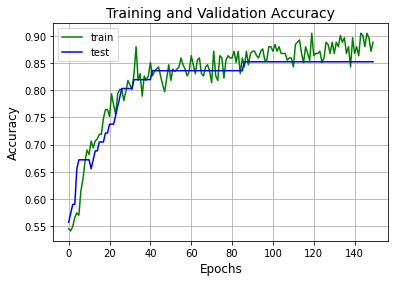

accuracy: 85.246%
Mean Accuracy: 84.699%
Standard Deviation: 2.045%
Losses:
[41.22095704078674, 38.113924860954285, 35.81731915473938]
Scores:
[81.96721076965332, 86.8852436542511, 85.24590134620667]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

cv_scores = []  # Scores for each k-Fold
losses = []  # Losses for each k-Fold
def create_model(batch_size, epochs, folds, neurons, dropout_rate):  
  """ Define DL model with specified parameters """
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  print("Batch size = %d, Epochs = %d, k-Folds = %d" % (batch_size, epochs, folds))
  for train, test in kfold.split(X, y):
   
    # Define Deep Learning model
    model = Sequential()
    # Input layer and Hidden Layer 1
    model.add(Dense(units=neurons[0], input_dim=13, activation='relu'))
    # model.add(Dropout(rate=dropout_rate))
    # Hidden Layer 2
    model.add(Dense(units=neurons[1],activation='relu'))
    # Dropout layer
    model.add(Dropout(rate=dropout_rate))
    # Output layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

    # Plot loss during training
    plt.plot(history.history['loss'], 'g', label='train')
    plt.plot(history.history['val_loss'], 'b', label='test')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot accuracy during training
    plt.plot(history.history['accuracy'], 'g', label='train')
    plt.plot(history.history['val_accuracy'], 'b', label='test')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

    # Print scores
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))
    losses.append(scores[0] * 100)  # Loss percentage
    cv_scores.append(scores[1] * 100)  # Score percentage
  return model

# With one dropout layer (optimal results from Random Search)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 
# 'dropout_rate': 0.4}
model = create_model(32, 150, 3, (14, 6), 0.4)

# With two dropout layers (results in too much underfitting)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 
# 'dropout_rate': 0.45}
# model = create_model(32, 150, 3, (14, 8), 0.45)

# Print results
print("Mean Accuracy: %.3f%%" % np.mean(cv_scores))
print("Standard Deviation: %.3f%%" % np.std(cv_scores))
print('Losses:')
print(losses)
print('Scores:')
print(cv_scores)

#### Sample Results:

##### Using one dropout layer (optimal results from Random Search):
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 'dropout_rate': 0.4}

<table border = "1">
  <thead>
    <th colspan = "5">With one dropout layer</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>85.792</td>
      <td>1.546</td>
      <td>[40.784, 36.420, 37.566]</td>
      <td>[83.607, 86.885, 86.885]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.234, 38.973, 37.645]</td>
      <td>[88.525, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[39.444, 36.632, 39.889]</td>
      <td>[81.967, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>88.525</td>
      <td>1.339</td>
      <td>[38.665, 30.301, 35.466]</td>
      <td>[86.885, 90.164, 88.525]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.047, 35.591, 39.353]</td>
      <td>[88.525, 83.607, 86.885]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>86.230<b></td>
      <td><b>1.804</b></td>
    </tr>
  </tbody>
</table>

##### With two dropout layers (results in too much underfitting)
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 'dropout_rate': 0.45}

<table border = "1">
  <thead>
    <th colspan = "5">With two dropout layers</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[36.204, 33.903, 37.372]</td>
      <td>[86.885, 83.607, 88.525]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>84.699</td>
      <td>2.045</td>
      <td>[37.547, 36.046, 32.915]</td>
      <td>[81.967, 85.246, 86.885]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>83.607</td>
      <td>1.339</td>
      <td>[40.159, 36.067, 40.181]</td>
      <td>[83.607, 85.246, 81.967]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[36.800, 38.977, 37.290]</td>
      <td>[83.607, 86.885, 81.967]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>85.246</td>
      <td>2.677</td>
      <td>[35.594, 41.179, 37.873]</td>
      <td>[85.246, 81.967, 88.525]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>85.409</b></td>
      <td><b>2.030</b></td>
    </tr>
  </tbody>
</table>

##### NOTE: These results vary between trials.

## Evaluate model

In [ ]:
# Predict test set results
y_pred = model.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))

[[0.07 0.  ]
 [0.67 1.  ]
 [0.74 0.  ]
 [0.11 0.  ]
 [0.22 1.  ]
 [0.36 0.  ]
 [0.12 0.  ]
 [0.27 0.  ]
 [0.01 0.  ]
 [0.05 0.  ]
 [0.98 1.  ]
 [0.99 1.  ]
 [0.15 0.  ]
 [0.91 1.  ]
 [1.   1.  ]
 [0.46 1.  ]
 [0.13 1.  ]
 [0.9  1.  ]
 [0.04 0.  ]
 [0.81 1.  ]
 [0.89 1.  ]
 [0.21 0.  ]
 [0.19 0.  ]
 [0.16 0.  ]
 [0.92 1.  ]
 [0.37 0.  ]
 [0.27 0.  ]
 [0.46 0.  ]
 [1.   1.  ]
 [0.71 1.  ]
 [0.82 0.  ]
 [0.11 0.  ]
 [1.   1.  ]
 [0.98 1.  ]
 [0.99 1.  ]
 [0.67 0.  ]
 [0.07 0.  ]
 [0.86 1.  ]
 [0.11 0.  ]
 [0.22 0.  ]
 [0.87 1.  ]
 [0.9  1.  ]
 [0.57 1.  ]
 [0.13 0.  ]
 [0.72 1.  ]
 [0.58 1.  ]
 [0.96 1.  ]
 [0.58 0.  ]
 [0.1  0.  ]
 [0.78 1.  ]
 [0.7  1.  ]
 [0.41 1.  ]
 [1.   1.  ]
 [0.96 1.  ]
 [1.   1.  ]
 [0.11 0.  ]
 [1.   1.  ]
 [0.96 0.  ]
 [0.98 1.  ]
 [1.   1.  ]
 [0.79 1.  ]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred) * 100)
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print(classification_report(y_test, y_pred))


[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]
[[22  5]
 [ 4 30]]
85.24590163934425
Test Accuracy: 85.246% 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.7321 - accuracy: 0.5155 - val_loss: 0.7038 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7306 - accuracy: 0.4940 - val_loss: 0.6905 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7110 - accuracy: 0.5515 - val_loss: 0.6784 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6874 - accuracy: 0.5889 - val_loss: 0.6669 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6650 - accuracy: 0.6398 - val_loss: 0.6562 - val_accuracy: 0.6721
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6581 - accuracy: 0.6383 - val_loss: 0.6454 - val_accuracy: 0.7049
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6347 - accuracy: 0.6810 - val_loss: 0.6344 -

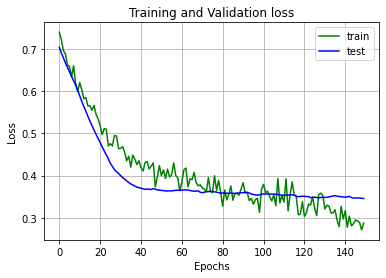

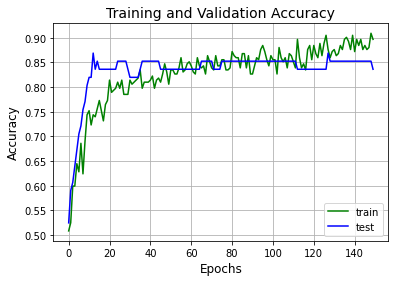

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 1.0223 - accuracy: 0.4678 - val_loss: 0.9765 - val_accuracy: 0.4754
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 1.0167 - accuracy: 0.4758 - val_loss: 0.9260 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.9381 - accuracy: 0.4852 - val_loss: 0.8822 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.8947 - accuracy: 0.4915 - val_loss: 0.8454 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8904 - accuracy: 0.4760 - val_loss: 0.8129 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.8117 - accuracy: 0.5427 - val_loss: 0.7858 - val_accuracy: 0.4590
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7915 - accuracy: 0.5664 - val_loss: 0.7628 - val_accuracy: 0.4754
Epoch

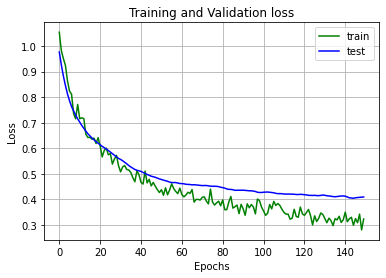

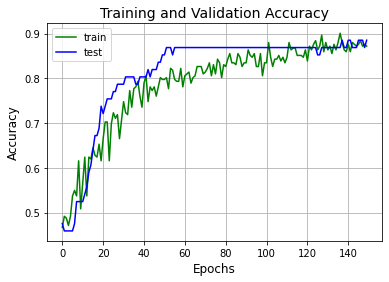

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.8458 - accuracy: 0.4118 - val_loss: 0.8257 - val_accuracy: 0.3279
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.8360 - accuracy: 0.4421 - val_loss: 0.7902 - val_accuracy: 0.3443
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7713 - accuracy: 0.5296 - val_loss: 0.7604 - val_accuracy: 0.3607
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7695 - accuracy: 0.4946 - val_loss: 0.7356 - val_accuracy: 0.3934
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7437 - accuracy: 0.4955 - val_loss: 0.7155 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7376 - accuracy: 0.4437 - val_loss: 0.6986 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6911 - accuracy: 0.5605 - val_loss: 0.6822 - val_accuracy: 0.5574
Ep

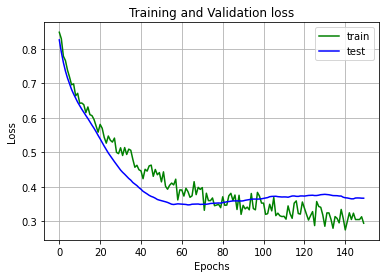

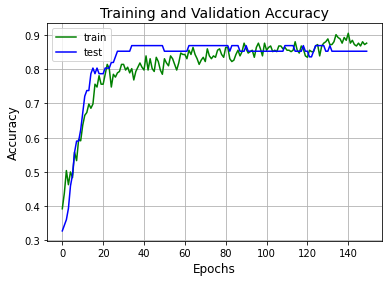

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.7267 - accuracy: 0.4968 - val_loss: 0.7331 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7104 - accuracy: 0.5613 - val_loss: 0.7184 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7137 - accuracy: 0.5064 - val_loss: 0.7044 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7048 - accuracy: 0.5527 - val_loss: 0.6917 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6617 - accuracy: 0.5731 - val_loss: 0.6794 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6482 - accuracy: 0.6022 - val_loss: 0.6680 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6399 - accuracy: 0.6752 - val_loss: 0.6586 

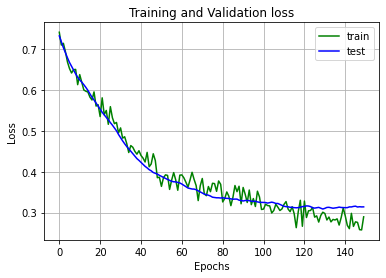

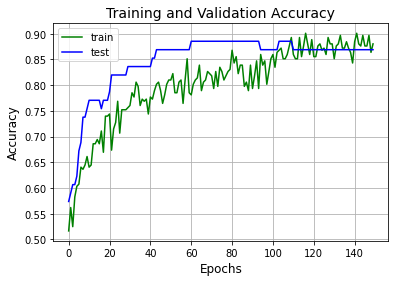

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.6669 - accuracy: 0.6052 - val_loss: 0.5940 - val_accuracy: 0.7869
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6317 - accuracy: 0.6154 - val_loss: 0.5794 - val_accuracy: 0.8033
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6814 - accuracy: 0.6155 - val_loss: 0.5671 - val_accuracy: 0.8033
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6273 - accuracy: 0.6006 - val_loss: 0.5562 - val_accuracy: 0.8197
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6197 - accuracy: 0.6524 - val_loss: 0.5453 - val_accuracy: 0.8361
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.5930 - accuracy: 0.6527 - val_loss: 0.5350 - val_accuracy: 0.8361
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.5770 - accuracy: 0.6715 - val_loss: 0.5244 - val_accuracy: 0.8852
Epo

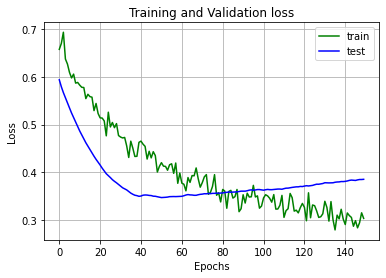

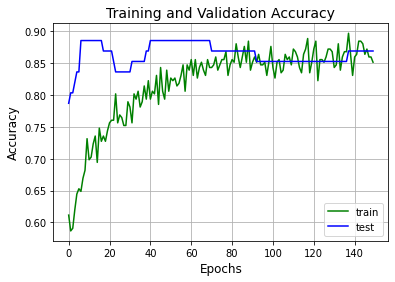

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7757 - accuracy: 0.4797 - val_loss: 0.6503 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7333 - accuracy: 0.5457 - val_loss: 0.6373 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7055 - accuracy: 0.5237 - val_loss: 0.6266 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6612 - accuracy: 0.5866 - val_loss: 0.6157 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.6017 - val_loss: 0.6049 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6425 - accuracy: 0.6088 - val_loss: 0.5958 - val_accuracy: 0.6230
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6076 - accuracy: 0.6748 - val_loss: 0.5883 - val_accuracy: 0.6393
Ep

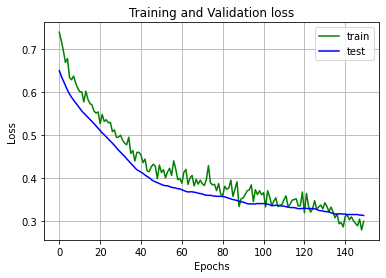

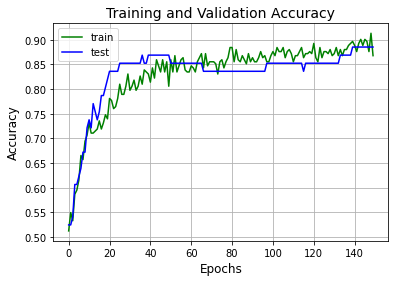

accuracy: 88.525%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.7721 - accuracy: 0.5256 - val_loss: 0.6781 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7186 - accuracy: 0.5593 - val_loss: 0.6638 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6937 - accuracy: 0.5908 - val_loss: 0.6500 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7524 - accuracy: 0.5901 - val_loss: 0.6376 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6656 - accuracy: 0.6109 - val_loss: 0.6274 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6605 - accuracy: 0.5875 - val_loss: 0.6185 - val_accuracy: 0.5738
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6578 - accuracy: 0.6003 - val_loss: 0.6097 

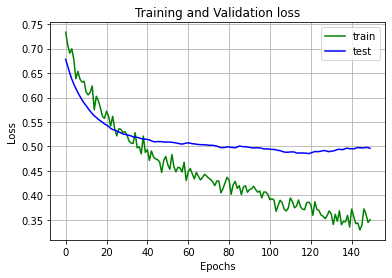

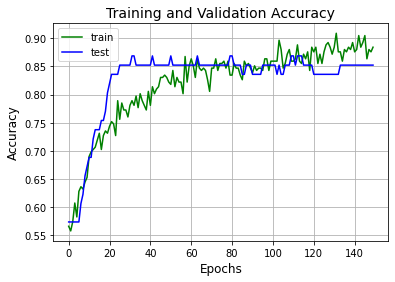

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.9056 - accuracy: 0.4409 - val_loss: 0.7889 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7500 - accuracy: 0.5105 - val_loss: 0.7440 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7094 - accuracy: 0.5742 - val_loss: 0.7047 - val_accuracy: 0.5902
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7580 - accuracy: 0.5028 - val_loss: 0.6710 - val_accuracy: 0.6557
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6653 - accuracy: 0.5455 - val_loss: 0.6413 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6695 - accuracy: 0.5504 - val_loss: 0.6170 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6667 - accuracy: 0.5971 - val_loss: 0.5965 - val_accuracy: 0.7705
Ep

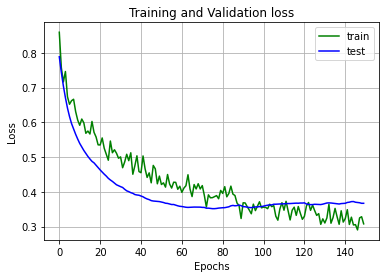

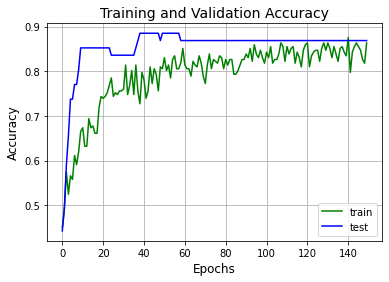

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.6604 - accuracy: 0.6041 - val_loss: 0.6557 - val_accuracy: 0.6885
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7106 - accuracy: 0.6350 - val_loss: 0.6392 - val_accuracy: 0.7213
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7086 - accuracy: 0.6062 - val_loss: 0.6220 - val_accuracy: 0.7377
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6450 - accuracy: 0.6853 - val_loss: 0.6060 - val_accuracy: 0.7869
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6795 - accuracy: 0.6330 - val_loss: 0.5915 - val_accuracy: 0.8197
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6162 - accuracy: 0.6628 - val_loss: 0.5788 - val_accuracy: 0.8033
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6411 - accuracy: 0.6953 - val_loss: 0.5665 - val_accuracy: 0.7869
Ep

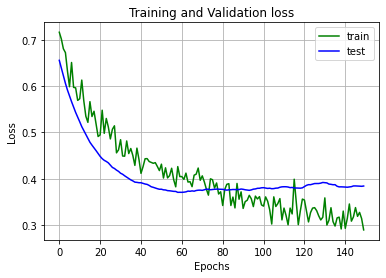

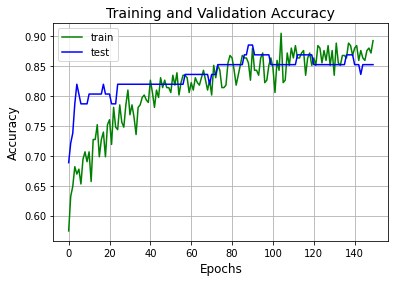

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.6742 - accuracy: 0.5843 - val_loss: 0.6508 - val_accuracy: 0.6721
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6561 - accuracy: 0.6271 - val_loss: 0.6352 - val_accuracy: 0.7049
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6388 - accuracy: 0.6735 - val_loss: 0.6205 - val_accuracy: 0.7213
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6423 - accuracy: 0.6499 - val_loss: 0.6057 - val_accuracy: 0.7213
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6140 - accuracy: 0.6930 - val_loss: 0.5906 - val_accuracy: 0.7213
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6094 - accuracy: 0.7096 - val_loss: 0.5763 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.5824 - accuracy: 0.7370 - val_loss: 0.5634 

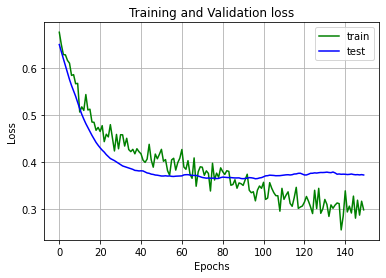

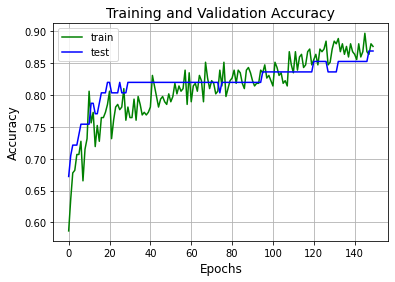

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.8994 - accuracy: 0.4035 - val_loss: 0.6878 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7877 - accuracy: 0.4888 - val_loss: 0.6635 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7741 - accuracy: 0.5112 - val_loss: 0.6439 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6848 - accuracy: 0.6047 - val_loss: 0.6293 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6958 - accuracy: 0.5945 - val_loss: 0.6175 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6739 - accuracy: 0.6573 - val_loss: 0.6078 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6661 - accuracy: 0.6371 - val_loss: 0.5987 - val_accuracy: 0.6230
Ep

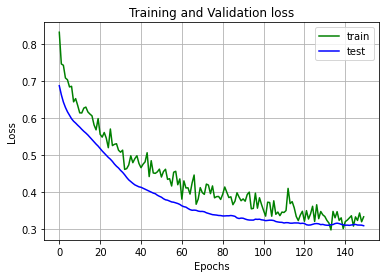

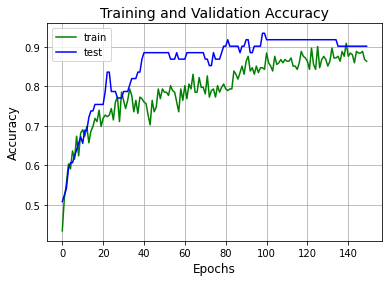

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 0.8228 - accuracy: 0.4557 - val_loss: 0.8051 - val_accuracy: 0.3770
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7695 - accuracy: 0.4853 - val_loss: 0.7671 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7280 - accuracy: 0.5325 - val_loss: 0.7364 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7513 - accuracy: 0.5100 - val_loss: 0.7097 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7105 - accuracy: 0.5557 - val_loss: 0.6867 - val_accuracy: 0.5246
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.5617 - val_loss: 0.6686 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6779 - accuracy: 0.5931 - val_loss: 0.6527 - val_accuracy: 0.6230
Ep

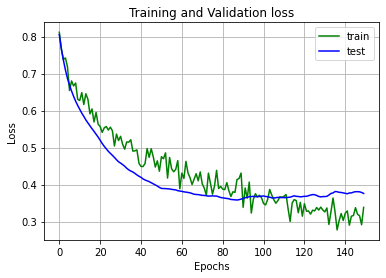

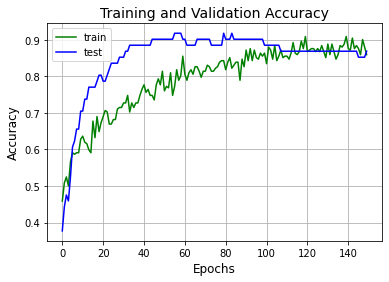

accuracy: 86.885%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7652 - accuracy: 0.5292 - val_loss: 0.7884 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7903 - accuracy: 0.5299 - val_loss: 0.7498 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 0.8002 - accuracy: 0.4683 - val_loss: 0.7191 - val_accuracy: 0.4426
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7081 - accuracy: 0.4952 - val_loss: 0.6958 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7050 - accuracy: 0.4948 - val_loss: 0.6763 - val_accuracy: 0.5082
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6782 - accuracy: 0.5641 - val_loss: 0.6601 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6442 - accuracy: 0.5939 - val_loss: 0.6476 

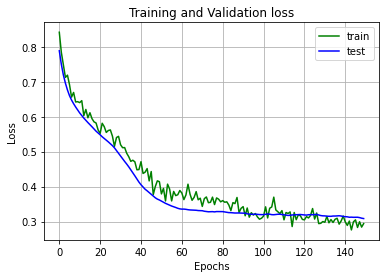

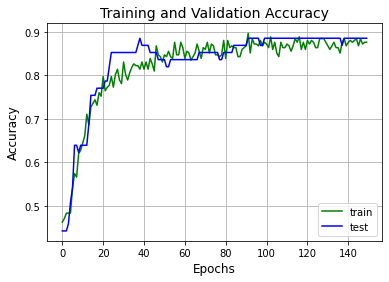

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.7216 - accuracy: 0.5510 - val_loss: 0.7109 - val_accuracy: 0.6066
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7053 - accuracy: 0.5573 - val_loss: 0.6903 - val_accuracy: 0.6393
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6760 - accuracy: 0.6121 - val_loss: 0.6726 - val_accuracy: 0.7049
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6823 - accuracy: 0.5639 - val_loss: 0.6565 - val_accuracy: 0.7049
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6881 - accuracy: 0.5755 - val_loss: 0.6424 - val_accuracy: 0.7049
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6630 - accuracy: 0.5953 - val_loss: 0.6290 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6289 - accuracy: 0.5735 - val_loss: 0.6161 - val_accuracy: 0.7213
Ep

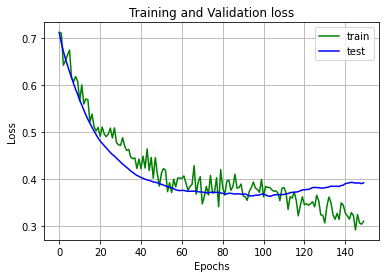

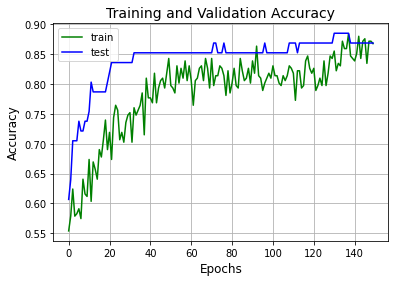

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.9504 - accuracy: 0.5032 - val_loss: 0.8319 - val_accuracy: 0.5410
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.8547 - accuracy: 0.5396 - val_loss: 0.7891 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7630 - accuracy: 0.5531 - val_loss: 0.7532 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7690 - accuracy: 0.5921 - val_loss: 0.7252 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7329 - accuracy: 0.6087 - val_loss: 0.7005 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7873 - accuracy: 0.5126 - val_loss: 0.6794 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6556 - accuracy: 0.6523 - val_loss: 0.6611 - val_accuracy: 0.6721
Ep

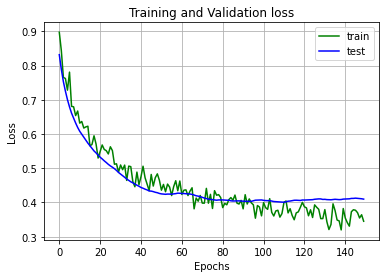

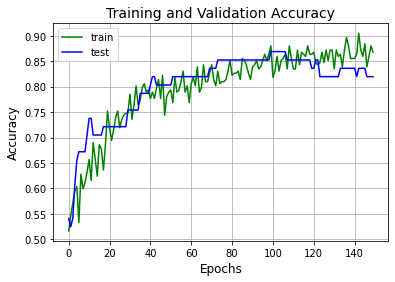

accuracy: 81.967%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.7243 - accuracy: 0.5312 - val_loss: 0.6402 - val_accuracy: 0.6393
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6948 - accuracy: 0.5960 - val_loss: 0.6230 - val_accuracy: 0.6393
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6724 - accuracy: 0.5922 - val_loss: 0.6058 - val_accuracy: 0.6721
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6341 - accuracy: 0.6459 - val_loss: 0.5899 - val_accuracy: 0.6885
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6228 - accuracy: 0.6611 - val_loss: 0.5742 - val_accuracy: 0.7213
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6132 - accuracy: 0.6738 - val_loss: 0.5603 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6021 - accuracy: 0.7204 - val_loss: 0.5460 

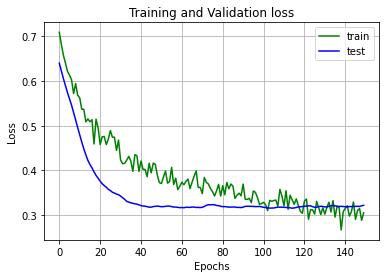

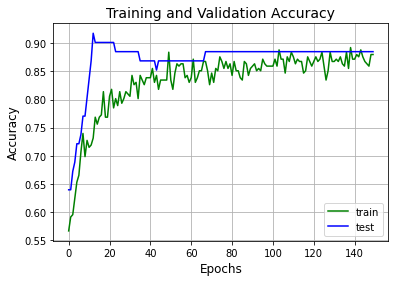

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.7504 - accuracy: 0.5591 - val_loss: 0.7271 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7356 - accuracy: 0.5182 - val_loss: 0.7126 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6854 - accuracy: 0.6004 - val_loss: 0.7011 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7207 - accuracy: 0.5270 - val_loss: 0.6901 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6755 - accuracy: 0.5859 - val_loss: 0.6797 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6860 - accuracy: 0.5900 - val_loss: 0.6692 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6456 - accuracy: 0.6155 - val_loss: 0.6594 - val_accuracy: 0.6393
Ep

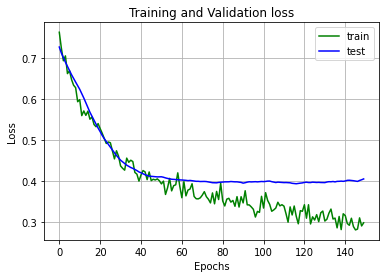

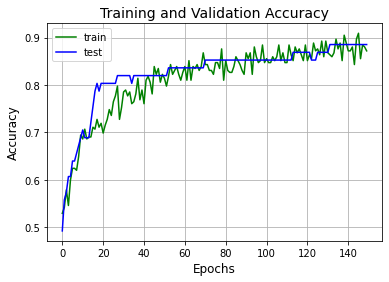

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.6582 - accuracy: 0.6227 - val_loss: 0.6075 - val_accuracy: 0.6557
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6612 - accuracy: 0.5886 - val_loss: 0.5962 - val_accuracy: 0.6230
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6797 - accuracy: 0.5898 - val_loss: 0.5870 - val_accuracy: 0.6393
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6080 - accuracy: 0.6816 - val_loss: 0.5769 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6346 - accuracy: 0.5813 - val_loss: 0.5668 - val_accuracy: 0.6393
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6166 - accuracy: 0.6608 - val_loss: 0.5581 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.5834 - accuracy: 0.7076 - val_loss: 0.5494 - val_accuracy: 0.6557
Ep

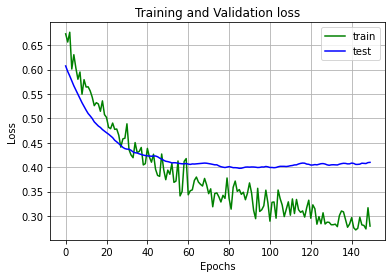

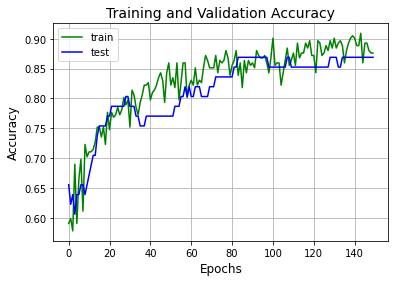

accuracy: 86.885%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.9244 - accuracy: 0.4005 - val_loss: 0.8263 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.9235 - accuracy: 0.4262 - val_loss: 0.7845 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8245 - accuracy: 0.4536 - val_loss: 0.7521 - val_accuracy: 0.4426
Epoch 4/150
8/8 [==============================] - 0s 16ms/step - loss: 0.8297 - accuracy: 0.4880 - val_loss: 0.7258 - val_accuracy: 0.4262
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7809 - accuracy: 0.4368 - val_loss: 0.7027 - val_accuracy: 0.5246
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7086 - accuracy: 0.5328 - val_loss: 0.6841 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6861 - accuracy: 0.5762 - val_loss: 0.6664 

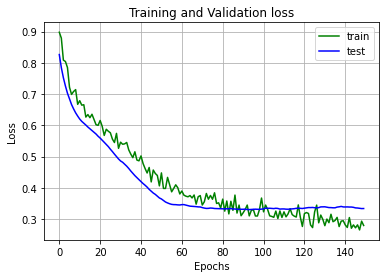

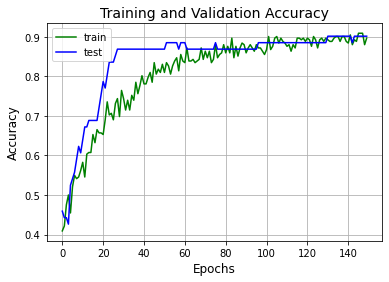

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 1.1597 - accuracy: 0.4132 - val_loss: 0.9198 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.9729 - accuracy: 0.3744 - val_loss: 0.8772 - val_accuracy: 0.5410
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.9852 - accuracy: 0.3701 - val_loss: 0.8392 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.9115 - accuracy: 0.3811 - val_loss: 0.8078 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.8680 - accuracy: 0.4511 - val_loss: 0.7783 - val_accuracy: 0.5410
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8449 - accuracy: 0.4349 - val_loss: 0.7515 - val_accuracy: 0.5738
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.8715 - accuracy: 0.3885 - val_loss: 0.7258 - val_accuracy: 0.5738
Ep

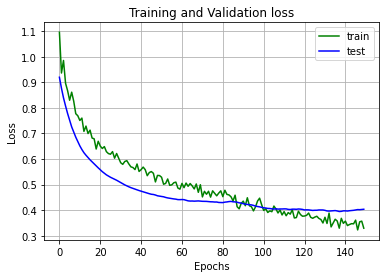

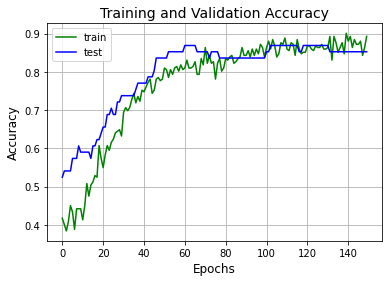

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7696 - accuracy: 0.5239 - val_loss: 0.8058 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7345 - accuracy: 0.5239 - val_loss: 0.7730 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7604 - accuracy: 0.4530 - val_loss: 0.7452 - val_accuracy: 0.4262
Epoch 4/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7103 - accuracy: 0.5337 - val_loss: 0.7210 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6798 - accuracy: 0.5735 - val_loss: 0.7003 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.6605 - accuracy: 0.6061 - val_loss: 0.6812 - val_accuracy: 0.4590
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6707 - accuracy: 0.5977 - val_loss: 0.6642 - val_accuracy: 0.5738
Ep

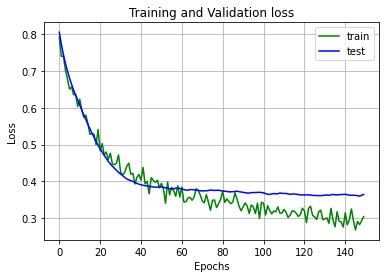

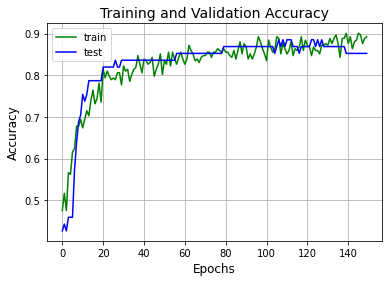

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.8345 - accuracy: 0.4213 - val_loss: 0.8385 - val_accuracy: 0.3443
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 0.8190 - accuracy: 0.4248 - val_loss: 0.8048 - val_accuracy: 0.3607
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.8175 - accuracy: 0.4570 - val_loss: 0.7722 - val_accuracy: 0.3934
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 0.7554 - accuracy: 0.4706 - val_loss: 0.7431 - val_accuracy: 0.4426
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7565 - accuracy: 0.5358 - val_loss: 0.7192 - val_accuracy: 0.4754
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6792 - accuracy: 0.5423 - val_loss: 0.6993 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7046 - accuracy: 0.5418 - val_loss: 0.6828 

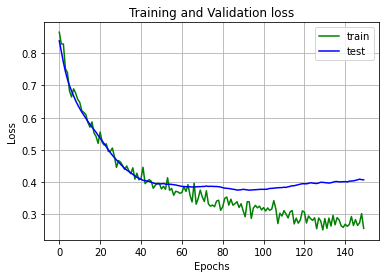

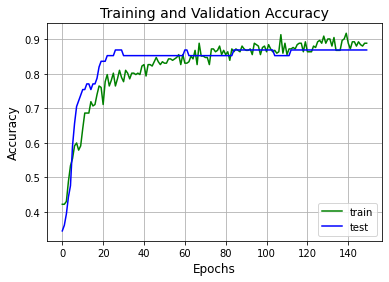

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.6706 - accuracy: 0.5968 - val_loss: 0.5992 - val_accuracy: 0.7049
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6498 - accuracy: 0.6380 - val_loss: 0.5843 - val_accuracy: 0.7213
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6286 - accuracy: 0.6361 - val_loss: 0.5726 - val_accuracy: 0.7377
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6614 - accuracy: 0.5738 - val_loss: 0.5601 - val_accuracy: 0.7869
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6427 - accuracy: 0.6044 - val_loss: 0.5491 - val_accuracy: 0.8033
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6006 - accuracy: 0.6519 - val_loss: 0.5377 - val_accuracy: 0.8033
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6080 - accuracy: 0.6814 - val_loss: 0.5266 - val_accuracy: 0.7869
Ep

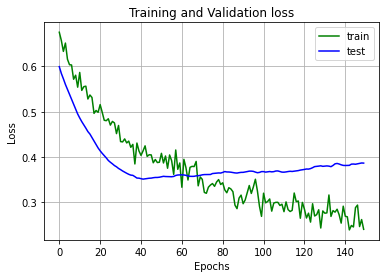

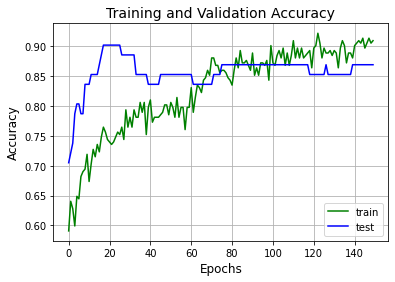

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.7789 - accuracy: 0.4863 - val_loss: 0.6872 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7726 - accuracy: 0.4782 - val_loss: 0.6693 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6895 - accuracy: 0.5451 - val_loss: 0.6528 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7083 - accuracy: 0.5724 - val_loss: 0.6375 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6953 - accuracy: 0.5659 - val_loss: 0.6225 - val_accuracy: 0.6885
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6507 - accuracy: 0.6144 - val_loss: 0.6085 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6589 - accuracy: 0.5892 - val_loss: 0.5964 - val_accuracy: 0.7213
Ep

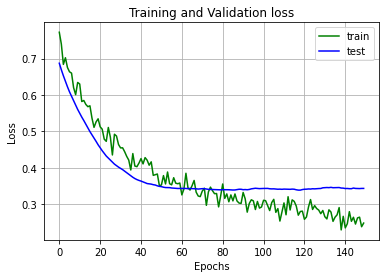

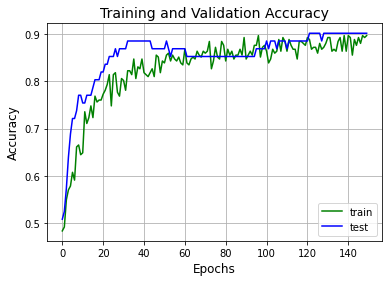

accuracy: 90.164%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.7204 - accuracy: 0.4729 - val_loss: 0.7002 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7217 - accuracy: 0.4662 - val_loss: 0.6946 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7169 - accuracy: 0.5022 - val_loss: 0.6895 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7042 - accuracy: 0.5362 - val_loss: 0.6849 - val_accuracy: 0.5574
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6919 - accuracy: 0.5586 - val_loss: 0.6802 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6588 - accuracy: 0.5881 - val_loss: 0.6756 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6637 - accuracy: 0.6316 - val_loss: 0.6711 

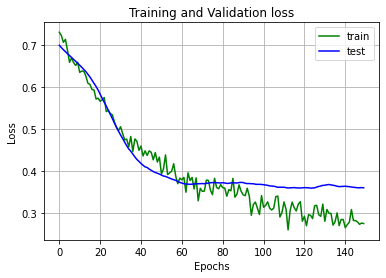

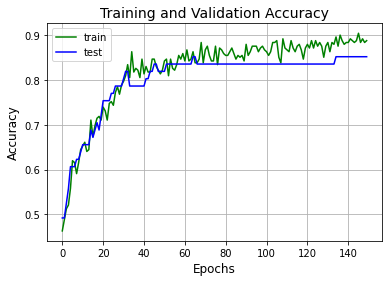

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.8811 - accuracy: 0.4522 - val_loss: 0.7912 - val_accuracy: 0.3934
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.8208 - accuracy: 0.4724 - val_loss: 0.7596 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.8129 - accuracy: 0.4136 - val_loss: 0.7334 - val_accuracy: 0.4918
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7367 - accuracy: 0.5386 - val_loss: 0.7097 - val_accuracy: 0.5246
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7677 - accuracy: 0.4913 - val_loss: 0.6891 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7304 - accuracy: 0.5403 - val_loss: 0.6724 - val_accuracy: 0.6230
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6987 - accuracy: 0.5410 - val_loss: 0.6561 - val_accuracy: 0.6721
Ep

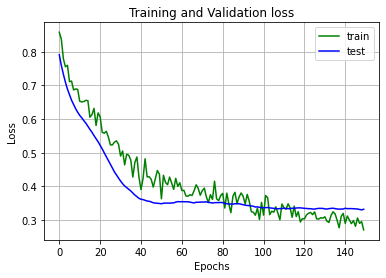

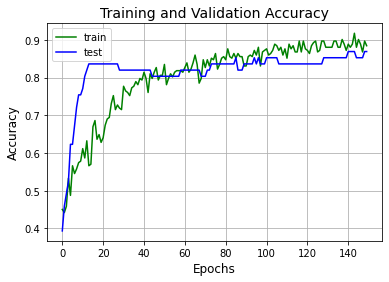

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 32ms/step - loss: 0.7816 - accuracy: 0.5102 - val_loss: 0.7353 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7311 - accuracy: 0.5496 - val_loss: 0.7110 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6807 - accuracy: 0.5503 - val_loss: 0.6889 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6981 - accuracy: 0.5159 - val_loss: 0.6684 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.5931 - accuracy: 0.6829 - val_loss: 0.6506 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6337 - accuracy: 0.6605 - val_loss: 0.6356 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.5989 - accuracy: 0.6984 - val_loss: 0.6203 - val_accuracy: 0.6885
Ep

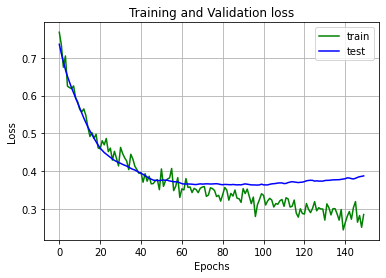

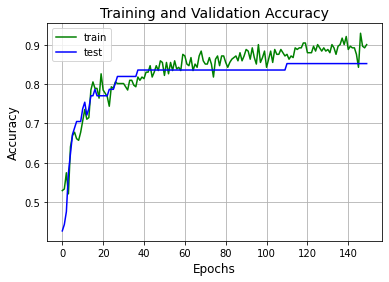

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.9069 - accuracy: 0.5459 - val_loss: 0.8007 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.8215 - accuracy: 0.5437 - val_loss: 0.7748 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8556 - accuracy: 0.5397 - val_loss: 0.7499 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7842 - accuracy: 0.5474 - val_loss: 0.7277 - val_accuracy: 0.4754
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7253 - accuracy: 0.5668 - val_loss: 0.7077 - val_accuracy: 0.4754
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7832 - accuracy: 0.5357 - val_loss: 0.6883 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7442 - accuracy: 0.5486 - val_loss: 0.6705 

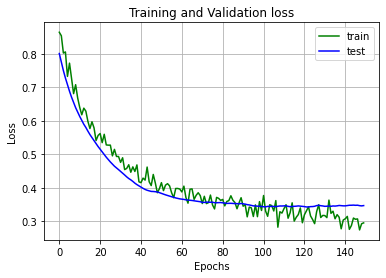

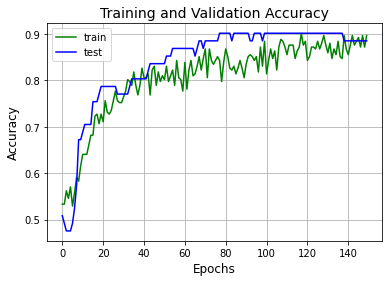

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.6996 - accuracy: 0.5397 - val_loss: 0.6992 - val_accuracy: 0.6557
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6717 - accuracy: 0.6260 - val_loss: 0.6833 - val_accuracy: 0.7213
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6399 - accuracy: 0.6510 - val_loss: 0.6700 - val_accuracy: 0.7705
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6699 - accuracy: 0.5582 - val_loss: 0.6564 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6340 - accuracy: 0.6473 - val_loss: 0.6449 - val_accuracy: 0.7541
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6304 - accuracy: 0.6102 - val_loss: 0.6335 - val_accuracy: 0.7541
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6218 - accuracy: 0.6436 - val_loss: 0.6221 - val_accuracy: 0.7705
Ep

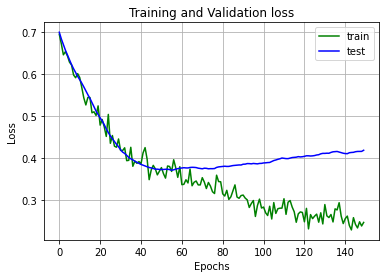

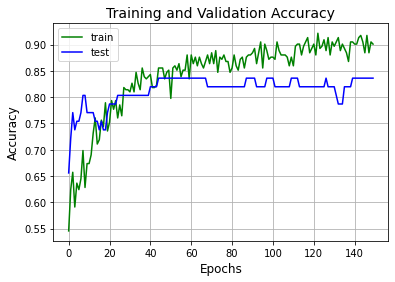

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7491 - accuracy: 0.4647 - val_loss: 0.6957 - val_accuracy: 0.6066
Epoch 2/150
8/8 [==============================] - 0s 12ms/step - loss: 0.7177 - accuracy: 0.5106 - val_loss: 0.6866 - val_accuracy: 0.6393
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7201 - accuracy: 0.5663 - val_loss: 0.6780 - val_accuracy: 0.6393
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6818 - accuracy: 0.5785 - val_loss: 0.6710 - val_accuracy: 0.6721
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6483 - accuracy: 0.6375 - val_loss: 0.6638 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6940 - accuracy: 0.6529 - val_loss: 0.6582 - val_accuracy: 0.6557
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6730 - accuracy: 0.6113 - val_loss: 0.6527 - val_accuracy: 0.6885
Ep

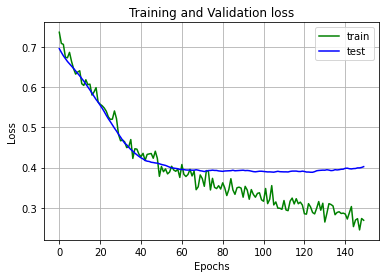

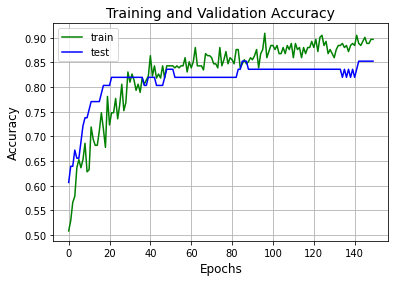

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 33ms/step - loss: 0.8297 - accuracy: 0.4359 - val_loss: 0.6921 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7533 - accuracy: 0.4976 - val_loss: 0.6736 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7059 - accuracy: 0.5607 - val_loss: 0.6569 - val_accuracy: 0.5902
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7181 - accuracy: 0.5354 - val_loss: 0.6427 - val_accuracy: 0.6066
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7189 - accuracy: 0.5024 - val_loss: 0.6296 - val_accuracy: 0.6721
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6654 - accuracy: 0.5663 - val_loss: 0.6175 - val_accuracy: 0.6557
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6775 - accuracy: 0.5670 - val_loss: 0.6082 

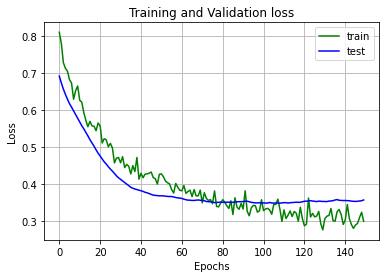

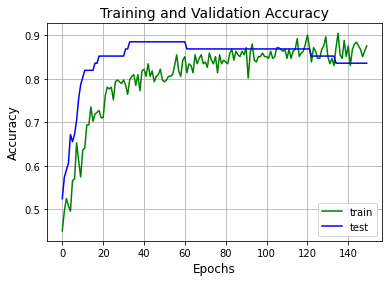

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7765 - accuracy: 0.5088 - val_loss: 0.6905 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7587 - accuracy: 0.5096 - val_loss: 0.6742 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7063 - accuracy: 0.5273 - val_loss: 0.6615 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7318 - accuracy: 0.5132 - val_loss: 0.6507 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6622 - accuracy: 0.5824 - val_loss: 0.6414 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.5739 - val_loss: 0.6332 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6750 - accuracy: 0.6040 - val_loss: 0.6259 - val_accuracy: 0.6066
Ep

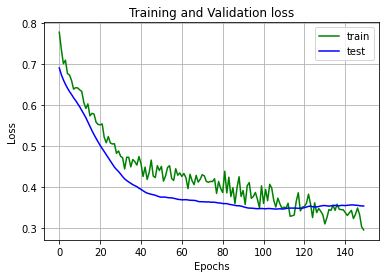

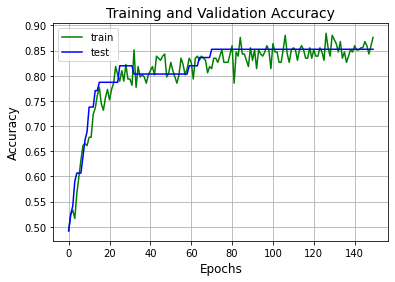

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7758 - accuracy: 0.4802 - val_loss: 0.7528 - val_accuracy: 0.4754
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7698 - accuracy: 0.5109 - val_loss: 0.7383 - val_accuracy: 0.4754
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7230 - accuracy: 0.5296 - val_loss: 0.7255 - val_accuracy: 0.4918
Epoch 4/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7172 - accuracy: 0.5355 - val_loss: 0.7139 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7363 - accuracy: 0.5119 - val_loss: 0.7054 - val_accuracy: 0.5082
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6915 - accuracy: 0.5383 - val_loss: 0.6977 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6813 - accuracy: 0.5382 - val_loss: 0.6913 - val_accuracy: 0.5246
Ep

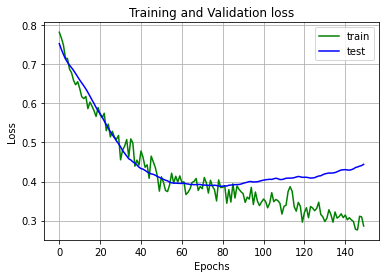

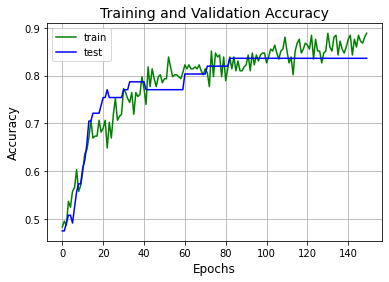

accuracy: 83.607%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.7015 - accuracy: 0.5854 - val_loss: 0.6948 - val_accuracy: 0.6230
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6926 - accuracy: 0.6280 - val_loss: 0.6724 - val_accuracy: 0.6393
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7282 - accuracy: 0.5114 - val_loss: 0.6527 - val_accuracy: 0.6557
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7202 - accuracy: 0.6264 - val_loss: 0.6348 - val_accuracy: 0.6721
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6401 - accuracy: 0.6578 - val_loss: 0.6192 - val_accuracy: 0.6885
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6473 - accuracy: 0.6915 - val_loss: 0.6043 - val_accuracy: 0.6885
Epoch 7/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6216 - accuracy: 0.6819 - val_loss: 0.5896 

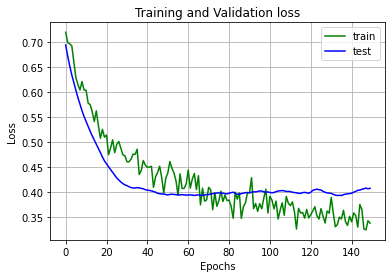

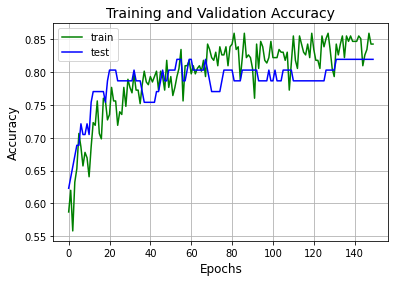

accuracy: 81.967%
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.7356 - accuracy: 0.5290 - val_loss: 0.6448 - val_accuracy: 0.6557
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7187 - accuracy: 0.4857 - val_loss: 0.6231 - val_accuracy: 0.7049
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7068 - accuracy: 0.5461 - val_loss: 0.6048 - val_accuracy: 0.7213
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7017 - accuracy: 0.5490 - val_loss: 0.5885 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6551 - accuracy: 0.5716 - val_loss: 0.5727 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6252 - accuracy: 0.6215 - val_loss: 0.5572 - val_accuracy: 0.8197
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6294 - accuracy: 0.6223 - val_loss: 0.5435 - val_accuracy: 0.8361
Ep

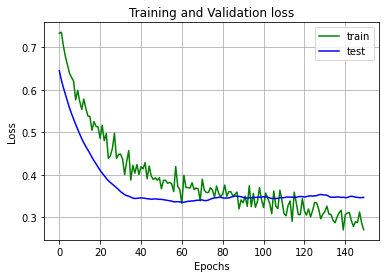

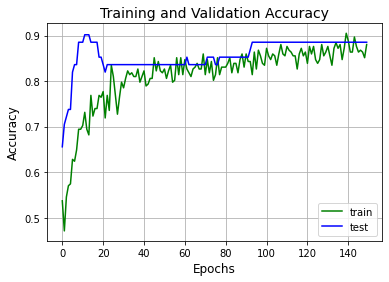

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.7925 - accuracy: 0.4763 - val_loss: 0.7596 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7954 - accuracy: 0.4877 - val_loss: 0.7412 - val_accuracy: 0.4098
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7706 - accuracy: 0.4354 - val_loss: 0.7248 - val_accuracy: 0.4262
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7726 - accuracy: 0.4233 - val_loss: 0.7113 - val_accuracy: 0.4426
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7286 - accuracy: 0.5411 - val_loss: 0.7000 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7292 - accuracy: 0.4732 - val_loss: 0.6915 - val_accuracy: 0.4590
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7255 - accuracy: 0.5216 - val_loss: 0.6839 - val_accuracy: 0.4754
Ep

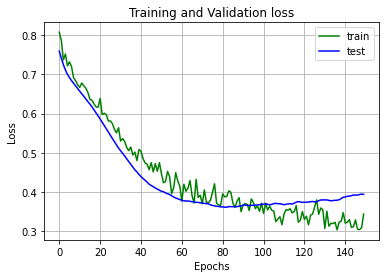

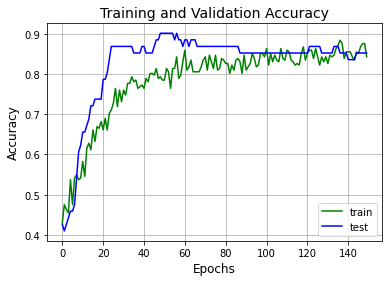

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 34ms/step - loss: 0.7285 - accuracy: 0.4739 - val_loss: 0.6703 - val_accuracy: 0.6393
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6997 - accuracy: 0.5671 - val_loss: 0.6571 - val_accuracy: 0.6885
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7121 - accuracy: 0.4819 - val_loss: 0.6455 - val_accuracy: 0.6885
Epoch 4/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6898 - accuracy: 0.5963 - val_loss: 0.6354 - val_accuracy: 0.6885
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6642 - accuracy: 0.5927 - val_loss: 0.6256 - val_accuracy: 0.7049
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6771 - accuracy: 0.5939 - val_loss: 0.6158 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6603 - accuracy: 0.6438 - val_loss: 0.6059 

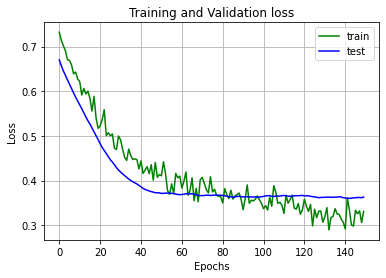

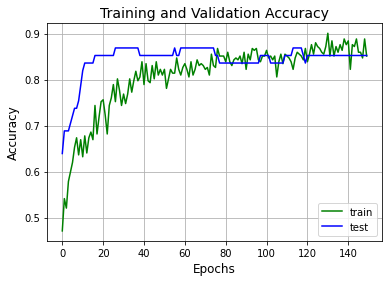

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 36ms/step - loss: 0.6717 - accuracy: 0.5647 - val_loss: 0.6798 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.5021 - val_loss: 0.6700 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6571 - accuracy: 0.5928 - val_loss: 0.6600 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6487 - accuracy: 0.6197 - val_loss: 0.6497 - val_accuracy: 0.6557
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6472 - accuracy: 0.6214 - val_loss: 0.6385 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6308 - accuracy: 0.6172 - val_loss: 0.6267 - val_accuracy: 0.6885
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6282 - accuracy: 0.6646 - val_loss: 0.6149 - val_accuracy: 0.7049
Ep

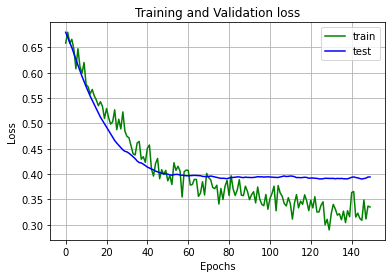

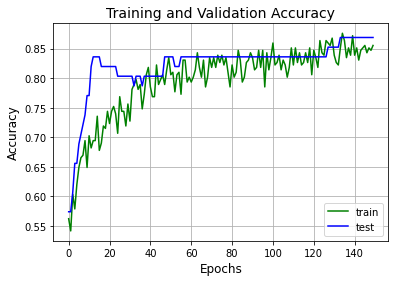

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 0.8159 - accuracy: 0.4921 - val_loss: 0.6760 - val_accuracy: 0.5902
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8223 - accuracy: 0.5052 - val_loss: 0.6456 - val_accuracy: 0.6721
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7501 - accuracy: 0.5483 - val_loss: 0.6185 - val_accuracy: 0.7705
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7207 - accuracy: 0.5174 - val_loss: 0.5953 - val_accuracy: 0.7705
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7062 - accuracy: 0.6266 - val_loss: 0.5752 - val_accuracy: 0.7705
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7016 - accuracy: 0.5737 - val_loss: 0.5584 - val_accuracy: 0.7541
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6654 - accuracy: 0.5432 - val_loss: 0.5440 - val_accuracy: 0.7377
Ep

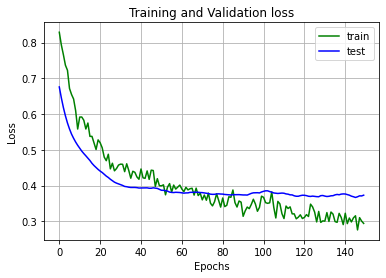

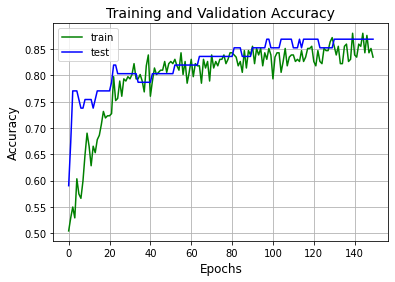

accuracy: 86.885%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 35ms/step - loss: 1.1437 - accuracy: 0.4913 - val_loss: 0.9563 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.9807 - accuracy: 0.4727 - val_loss: 0.8939 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 1.0371 - accuracy: 0.4544 - val_loss: 0.8393 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8914 - accuracy: 0.4731 - val_loss: 0.7936 - val_accuracy: 0.4754
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8919 - accuracy: 0.4855 - val_loss: 0.7554 - val_accuracy: 0.4918
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8765 - accuracy: 0.4488 - val_loss: 0.7201 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7792 - accuracy: 0.4903 - val_loss: 0.6911 

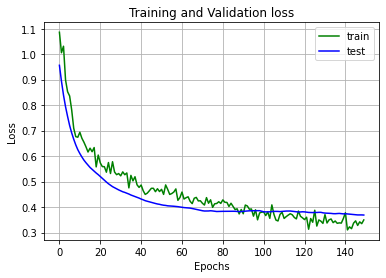

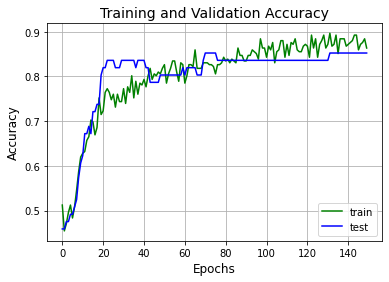

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 37ms/step - loss: 1.1316 - accuracy: 0.3563 - val_loss: 0.8755 - val_accuracy: 0.3279
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 1.0023 - accuracy: 0.4052 - val_loss: 0.8294 - val_accuracy: 0.3443
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.9282 - accuracy: 0.3492 - val_loss: 0.7872 - val_accuracy: 0.3934
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8191 - accuracy: 0.4388 - val_loss: 0.7517 - val_accuracy: 0.4098
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8294 - accuracy: 0.4733 - val_loss: 0.7201 - val_accuracy: 0.4262
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7798 - accuracy: 0.4964 - val_loss: 0.6940 - val_accuracy: 0.4754
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8051 - accuracy: 0.4665 - val_loss: 0.6712 - val_accuracy: 0.5574
Ep

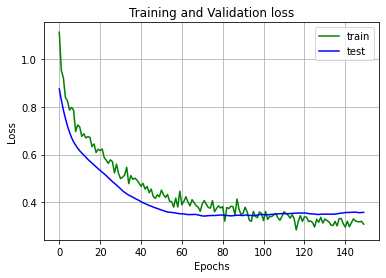

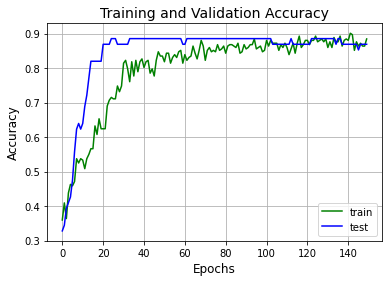

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 38ms/step - loss: 0.6736 - accuracy: 0.4823 - val_loss: 0.6952 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6608 - accuracy: 0.4860 - val_loss: 0.6827 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6548 - accuracy: 0.5081 - val_loss: 0.6715 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6583 - accuracy: 0.5337 - val_loss: 0.6620 - val_accuracy: 0.5246
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6810 - accuracy: 0.5424 - val_loss: 0.6531 - val_accuracy: 0.5246
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6465 - accuracy: 0.5724 - val_loss: 0.6451 - val_accuracy: 0.5574
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6616 - accuracy: 0.5855 - val_loss: 0.6389 - val_accuracy: 0.5410
Ep

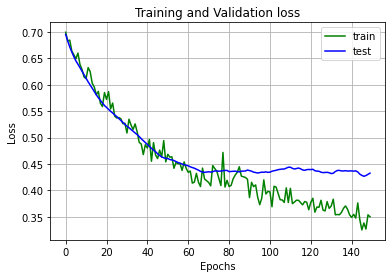

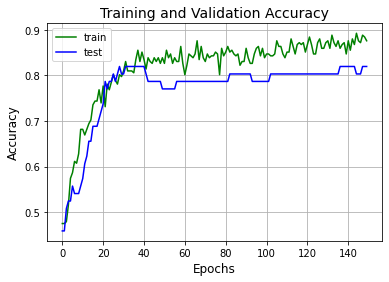

accuracy: 81.967%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 36ms/step - loss: 0.7448 - accuracy: 0.4787 - val_loss: 0.8086 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7783 - accuracy: 0.4949 - val_loss: 0.7814 - val_accuracy: 0.5082
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7190 - accuracy: 0.5562 - val_loss: 0.7560 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6916 - accuracy: 0.6130 - val_loss: 0.7333 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7022 - accuracy: 0.5936 - val_loss: 0.7150 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6596 - accuracy: 0.6794 - val_loss: 0.7007 - val_accuracy: 0.6230
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6369 - accuracy: 0.6607 - val_loss: 0.6877 

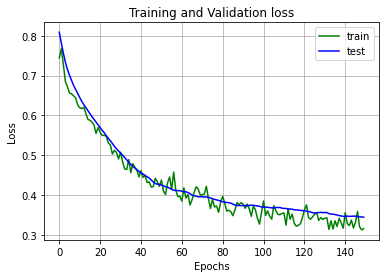

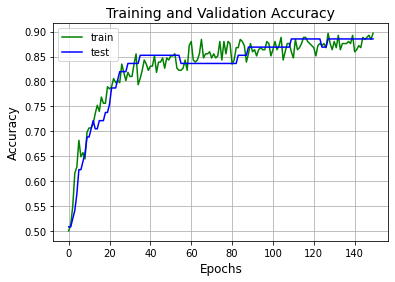

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 36ms/step - loss: 0.7556 - accuracy: 0.4939 - val_loss: 0.7607 - val_accuracy: 0.3934
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7264 - accuracy: 0.4739 - val_loss: 0.7448 - val_accuracy: 0.3934
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7311 - accuracy: 0.4897 - val_loss: 0.7313 - val_accuracy: 0.3934
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7446 - accuracy: 0.4411 - val_loss: 0.7207 - val_accuracy: 0.4098
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7215 - accuracy: 0.5305 - val_loss: 0.7117 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7035 - accuracy: 0.5158 - val_loss: 0.7038 - val_accuracy: 0.5246
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.5364 - val_loss: 0.6968 - val_accuracy: 0.5246
Ep

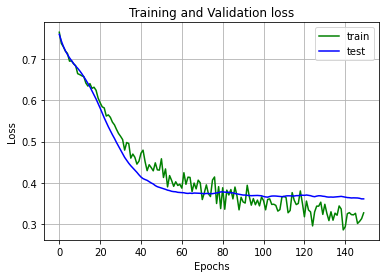

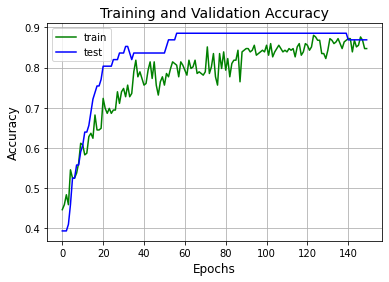

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.6824 - accuracy: 0.5535 - val_loss: 0.6778 - val_accuracy: 0.6230
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7044 - accuracy: 0.6033 - val_loss: 0.6537 - val_accuracy: 0.6393
Epoch 3/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.5990 - val_loss: 0.6339 - val_accuracy: 0.6393
Epoch 4/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6723 - accuracy: 0.5878 - val_loss: 0.6205 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6475 - accuracy: 0.6394 - val_loss: 0.6103 - val_accuracy: 0.7049
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6045 - accuracy: 0.6521 - val_loss: 0.6003 - val_accuracy: 0.7049
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5990 - accuracy: 0.6641 - val_loss: 0.5912 - val_accuracy: 0.7213
Ep

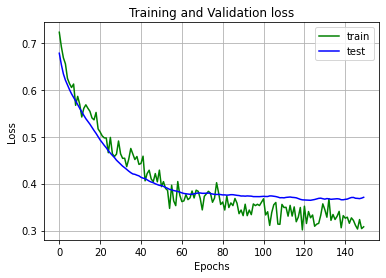

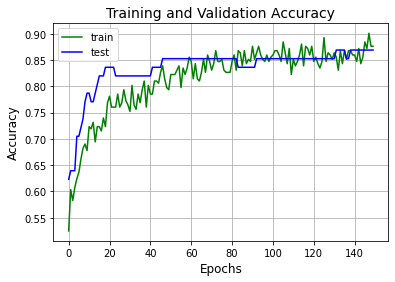

accuracy: 86.885%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 39ms/step - loss: 0.8537 - accuracy: 0.4472 - val_loss: 0.7859 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8382 - accuracy: 0.4755 - val_loss: 0.7577 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8707 - accuracy: 0.3933 - val_loss: 0.7360 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8119 - accuracy: 0.4711 - val_loss: 0.7176 - val_accuracy: 0.5246
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7726 - accuracy: 0.4690 - val_loss: 0.7014 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7898 - accuracy: 0.4662 - val_loss: 0.6858 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7391 - accuracy: 0.4805 - val_loss: 0.6723 

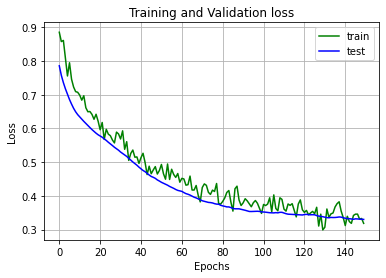

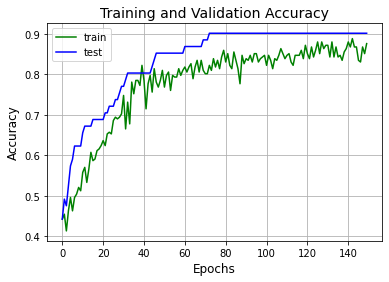

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.7154 - accuracy: 0.4839 - val_loss: 0.7002 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7232 - accuracy: 0.4809 - val_loss: 0.6845 - val_accuracy: 0.5410
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7247 - accuracy: 0.4554 - val_loss: 0.6715 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6972 - accuracy: 0.5563 - val_loss: 0.6602 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6777 - accuracy: 0.5812 - val_loss: 0.6500 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6454 - accuracy: 0.6455 - val_loss: 0.6409 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6338 - accuracy: 0.6672 - val_loss: 0.6329 - val_accuracy: 0.6885
Ep

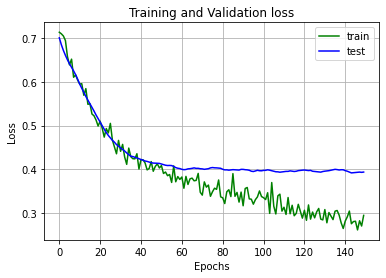

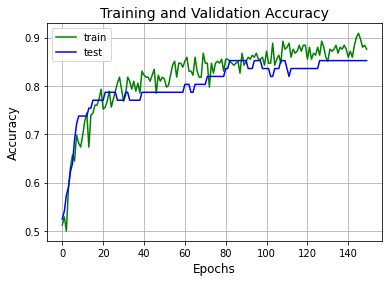

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 47ms/step - loss: 1.0428 - accuracy: 0.4116 - val_loss: 1.0288 - val_accuracy: 0.3770
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 1.0664 - accuracy: 0.4277 - val_loss: 0.9718 - val_accuracy: 0.3770
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 1.0146 - accuracy: 0.3857 - val_loss: 0.9223 - val_accuracy: 0.3770
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.9758 - accuracy: 0.3839 - val_loss: 0.8806 - val_accuracy: 0.3607
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8743 - accuracy: 0.4895 - val_loss: 0.8458 - val_accuracy: 0.3607
Epoch 6/150
8/8 [==============================] - 0s 17ms/step - loss: 0.8492 - accuracy: 0.4505 - val_loss: 0.8138 - val_accuracy: 0.3443
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8318 - accuracy: 0.4458 - val_loss: 0.7863 - val_accuracy: 0.3443
Ep

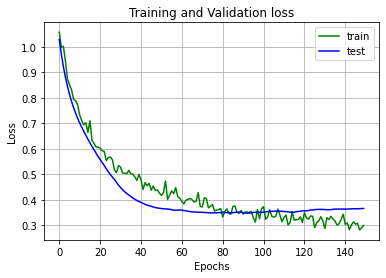

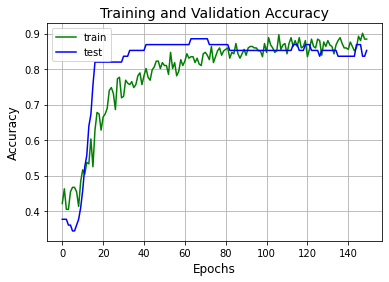

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.7647 - accuracy: 0.5546 - val_loss: 0.7982 - val_accuracy: 0.4098
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7338 - accuracy: 0.5897 - val_loss: 0.7747 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7379 - accuracy: 0.5749 - val_loss: 0.7540 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6988 - accuracy: 0.5774 - val_loss: 0.7342 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7229 - accuracy: 0.5716 - val_loss: 0.7177 - val_accuracy: 0.5410
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6745 - accuracy: 0.6045 - val_loss: 0.7032 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6767 - accuracy: 0.6350 - val_loss: 0.6891 

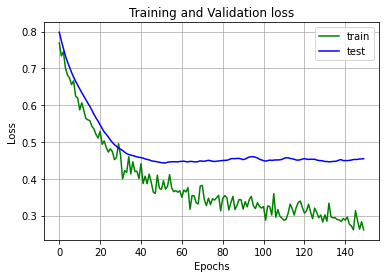

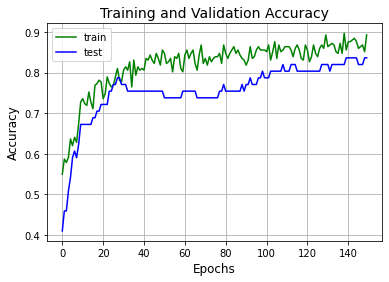

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.7677 - accuracy: 0.4800 - val_loss: 0.6992 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7669 - accuracy: 0.4743 - val_loss: 0.6902 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7040 - accuracy: 0.5444 - val_loss: 0.6832 - val_accuracy: 0.5082
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7130 - accuracy: 0.5379 - val_loss: 0.6768 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6804 - accuracy: 0.5831 - val_loss: 0.6701 - val_accuracy: 0.5246
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6685 - accuracy: 0.5917 - val_loss: 0.6637 - val_accuracy: 0.5246
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6820 - accuracy: 0.5615 - val_loss: 0.6575 - val_accuracy: 0.5574
Ep

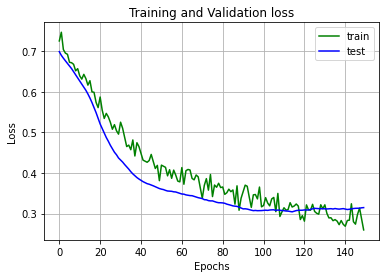

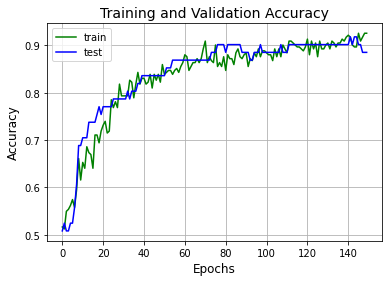

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 54ms/step - loss: 0.6657 - accuracy: 0.5056 - val_loss: 0.7064 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6698 - accuracy: 0.5973 - val_loss: 0.6926 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6544 - accuracy: 0.6203 - val_loss: 0.6815 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6659 - accuracy: 0.5744 - val_loss: 0.6711 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6216 - accuracy: 0.6621 - val_loss: 0.6596 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6212 - accuracy: 0.7027 - val_loss: 0.6481 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.5972 - accuracy: 0.7317 - val_loss: 0.6372 - val_accuracy: 0.6393
Ep

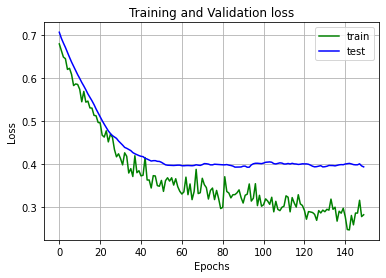

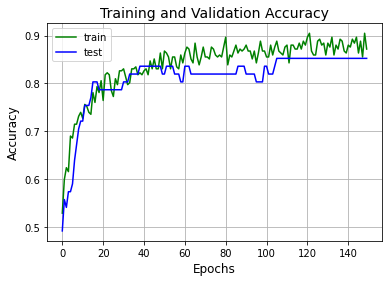

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.8315 - accuracy: 0.4519 - val_loss: 0.7733 - val_accuracy: 0.5410
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6754 - accuracy: 0.5705 - val_loss: 0.7416 - val_accuracy: 0.5410
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7388 - accuracy: 0.5293 - val_loss: 0.7124 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6927 - accuracy: 0.5925 - val_loss: 0.6876 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6885 - accuracy: 0.5820 - val_loss: 0.6672 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6595 - accuracy: 0.5907 - val_loss: 0.6504 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6540 - accuracy: 0.6051 - val_loss: 0.6375 

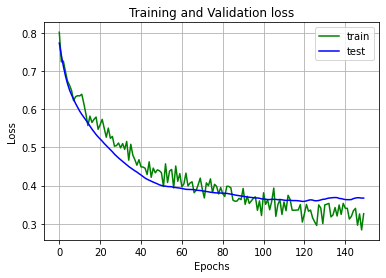

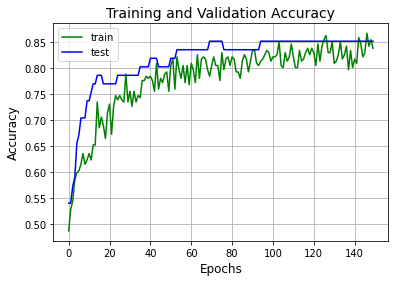

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7412 - accuracy: 0.4639 - val_loss: 0.7189 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7612 - accuracy: 0.4350 - val_loss: 0.6988 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7125 - accuracy: 0.5645 - val_loss: 0.6814 - val_accuracy: 0.6230
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6798 - accuracy: 0.5647 - val_loss: 0.6669 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6913 - accuracy: 0.5558 - val_loss: 0.6537 - val_accuracy: 0.6885
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6879 - accuracy: 0.5399 - val_loss: 0.6432 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6972 - accuracy: 0.5199 - val_loss: 0.6327 - val_accuracy: 0.7541
Ep

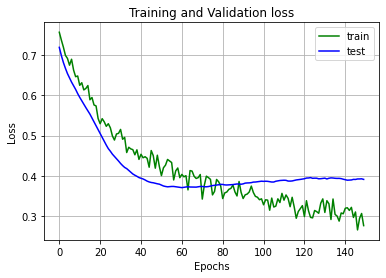

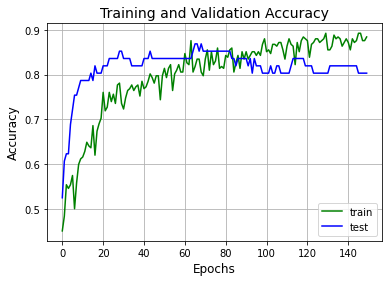

accuracy: 80.328%
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.6877 - accuracy: 0.5463 - val_loss: 0.6721 - val_accuracy: 0.5902
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6465 - accuracy: 0.6535 - val_loss: 0.6595 - val_accuracy: 0.6230
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.5799 - val_loss: 0.6471 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6283 - accuracy: 0.6412 - val_loss: 0.6356 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6105 - accuracy: 0.6865 - val_loss: 0.6237 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6236 - accuracy: 0.7088 - val_loss: 0.6124 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6228 - accuracy: 0.6744 - val_loss: 0.6001 - val_accuracy: 0.6885
Ep

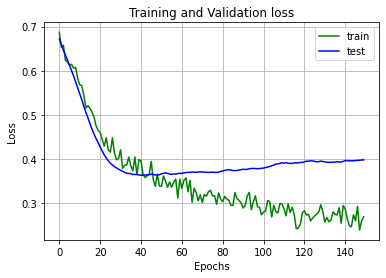

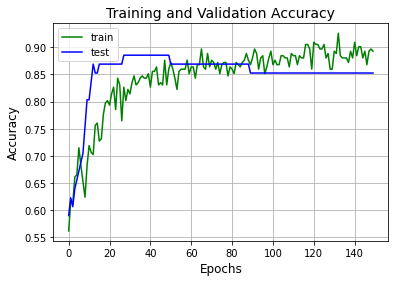

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.7287 - accuracy: 0.3872 - val_loss: 0.7134 - val_accuracy: 0.3115
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6843 - accuracy: 0.5228 - val_loss: 0.7025 - val_accuracy: 0.3607
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7024 - accuracy: 0.4588 - val_loss: 0.6942 - val_accuracy: 0.4262
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6815 - accuracy: 0.4964 - val_loss: 0.6860 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6676 - accuracy: 0.5428 - val_loss: 0.6776 - val_accuracy: 0.4918
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6556 - accuracy: 0.6209 - val_loss: 0.6682 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6672 - accuracy: 0.5756 - val_loss: 0.6574 

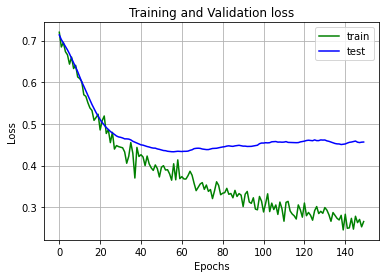

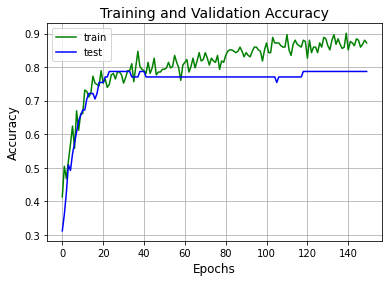

accuracy: 78.689%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.9462 - accuracy: 0.4729 - val_loss: 0.8021 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8319 - accuracy: 0.5151 - val_loss: 0.7617 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8092 - accuracy: 0.4876 - val_loss: 0.7286 - val_accuracy: 0.4262
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7721 - accuracy: 0.4895 - val_loss: 0.7032 - val_accuracy: 0.4754
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7502 - accuracy: 0.5188 - val_loss: 0.6811 - val_accuracy: 0.4754
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7448 - accuracy: 0.5023 - val_loss: 0.6592 - val_accuracy: 0.5082
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7257 - accuracy: 0.4910 - val_loss: 0.6435 - val_accuracy: 0.5410
Ep

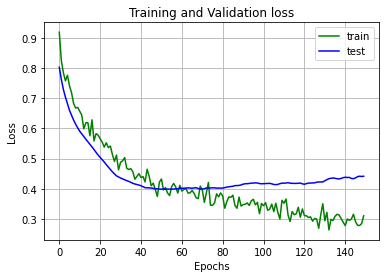

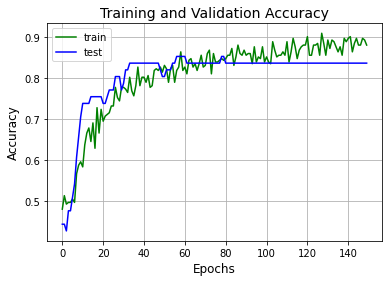

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.8944 - accuracy: 0.5052 - val_loss: 0.7950 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8289 - accuracy: 0.5306 - val_loss: 0.7620 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7886 - accuracy: 0.5261 - val_loss: 0.7326 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7307 - accuracy: 0.5701 - val_loss: 0.7048 - val_accuracy: 0.5574
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7194 - accuracy: 0.5340 - val_loss: 0.6851 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7138 - accuracy: 0.5641 - val_loss: 0.6669 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6901 - accuracy: 0.5416 - val_loss: 0.6522 - val_accuracy: 0.6230
Ep

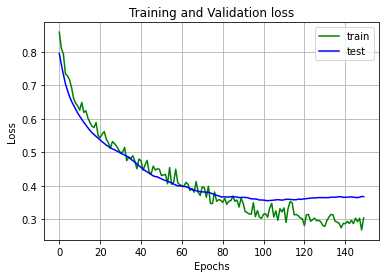

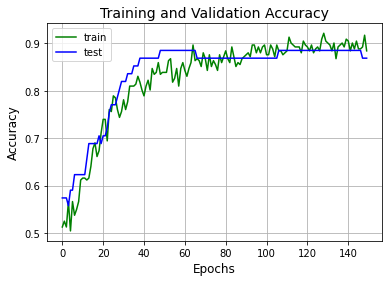

accuracy: 86.885%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 45ms/step - loss: 0.9182 - accuracy: 0.5280 - val_loss: 0.7359 - val_accuracy: 0.4754
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8244 - accuracy: 0.5637 - val_loss: 0.7111 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8237 - accuracy: 0.5452 - val_loss: 0.6881 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7989 - accuracy: 0.5604 - val_loss: 0.6670 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7193 - accuracy: 0.6094 - val_loss: 0.6491 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7369 - accuracy: 0.5665 - val_loss: 0.6342 - val_accuracy: 0.6557
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6539 - accuracy: 0.6365 - val_loss: 0.6214 

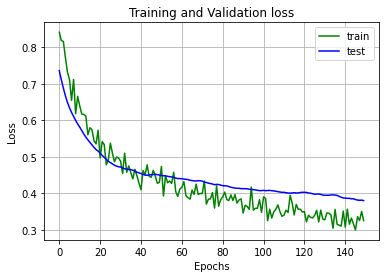

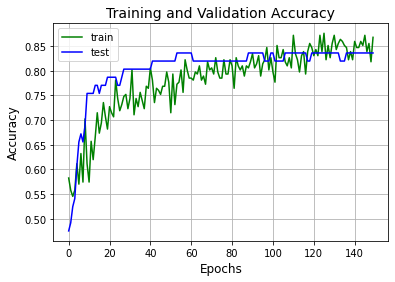

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7312 - accuracy: 0.4939 - val_loss: 0.6685 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6868 - accuracy: 0.5468 - val_loss: 0.6549 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6564 - accuracy: 0.5535 - val_loss: 0.6408 - val_accuracy: 0.6557
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6423 - accuracy: 0.5906 - val_loss: 0.6282 - val_accuracy: 0.6721
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6403 - accuracy: 0.6558 - val_loss: 0.6177 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6630 - accuracy: 0.5522 - val_loss: 0.6087 - val_accuracy: 0.7541
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6165 - accuracy: 0.6895 - val_loss: 0.6005 - val_accuracy: 0.7869
Ep

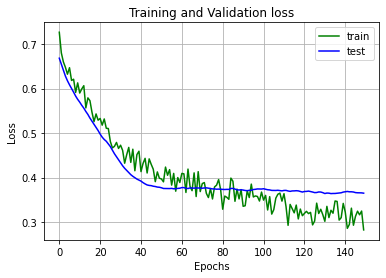

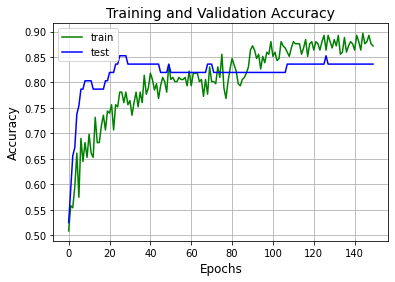

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.7051 - accuracy: 0.5850 - val_loss: 0.6648 - val_accuracy: 0.5902
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7135 - accuracy: 0.5464 - val_loss: 0.6446 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7076 - accuracy: 0.5651 - val_loss: 0.6283 - val_accuracy: 0.6230
Epoch 4/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6467 - accuracy: 0.6727 - val_loss: 0.6120 - val_accuracy: 0.6721
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6447 - accuracy: 0.6248 - val_loss: 0.5972 - val_accuracy: 0.6721
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6697 - accuracy: 0.6150 - val_loss: 0.5840 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6163 - accuracy: 0.6600 - val_loss: 0.5723 - val_accuracy: 0.6885
Ep

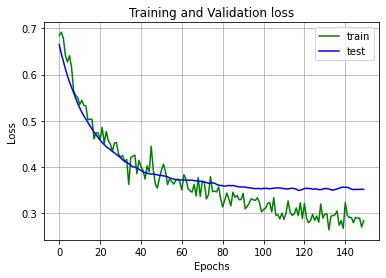

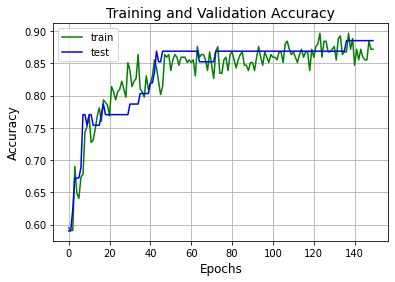

accuracy: 88.525%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.8766 - accuracy: 0.4151 - val_loss: 0.8371 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8328 - accuracy: 0.4942 - val_loss: 0.8040 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 17ms/step - loss: 0.7537 - accuracy: 0.5176 - val_loss: 0.7743 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7850 - accuracy: 0.5152 - val_loss: 0.7486 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7320 - accuracy: 0.5345 - val_loss: 0.7258 - val_accuracy: 0.5410
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7044 - accuracy: 0.5627 - val_loss: 0.7058 - val_accuracy: 0.5574
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6832 - accuracy: 0.5475 - val_loss: 0.6876 

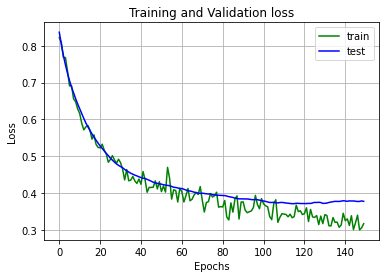

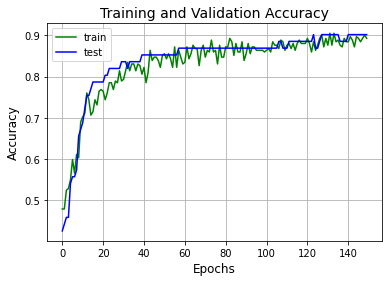

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 52ms/step - loss: 0.8476 - accuracy: 0.3784 - val_loss: 0.7502 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8201 - accuracy: 0.4517 - val_loss: 0.7204 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7980 - accuracy: 0.4005 - val_loss: 0.6941 - val_accuracy: 0.5902
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6778 - accuracy: 0.6012 - val_loss: 0.6730 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6823 - accuracy: 0.5632 - val_loss: 0.6547 - val_accuracy: 0.6885
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6796 - accuracy: 0.5868 - val_loss: 0.6364 - val_accuracy: 0.7049
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6904 - accuracy: 0.5687 - val_loss: 0.6201 - val_accuracy: 0.7213
Ep

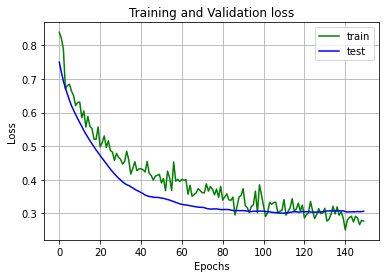

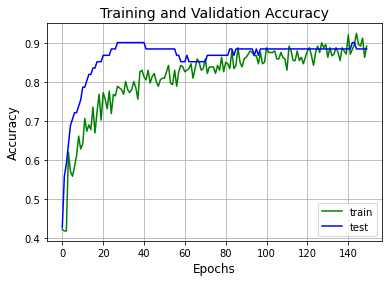

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 47ms/step - loss: 0.8270 - accuracy: 0.4669 - val_loss: 0.7412 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.8090 - accuracy: 0.5012 - val_loss: 0.7178 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7375 - accuracy: 0.5779 - val_loss: 0.6958 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6936 - accuracy: 0.5740 - val_loss: 0.6760 - val_accuracy: 0.5574
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6967 - accuracy: 0.5348 - val_loss: 0.6601 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6795 - accuracy: 0.5899 - val_loss: 0.6456 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6842 - accuracy: 0.5646 - val_loss: 0.6327 - val_accuracy: 0.6230
Ep

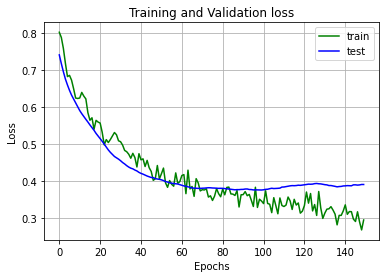

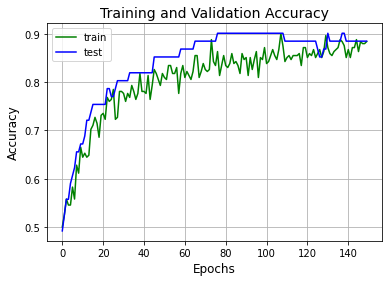

accuracy: 88.525%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.8687 - accuracy: 0.4778 - val_loss: 0.7866 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 19ms/step - loss: 0.8228 - accuracy: 0.4477 - val_loss: 0.7589 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7945 - accuracy: 0.4490 - val_loss: 0.7373 - val_accuracy: 0.4426
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7630 - accuracy: 0.4801 - val_loss: 0.7193 - val_accuracy: 0.4426
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7610 - accuracy: 0.4587 - val_loss: 0.7047 - val_accuracy: 0.4426
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.5284 - val_loss: 0.6930 - val_accuracy: 0.4590
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7090 - accuracy: 0.4991 - val_loss: 0.6827 

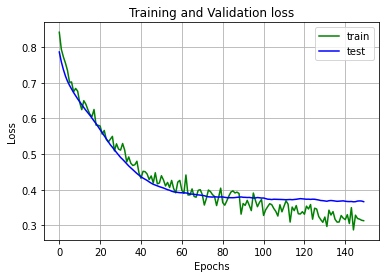

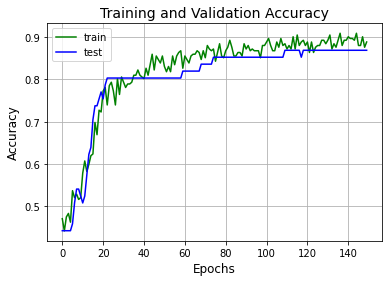

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.6755 - accuracy: 0.5644 - val_loss: 0.6935 - val_accuracy: 0.6230
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6738 - accuracy: 0.6005 - val_loss: 0.6770 - val_accuracy: 0.6557
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6747 - accuracy: 0.5741 - val_loss: 0.6616 - val_accuracy: 0.6557
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6445 - accuracy: 0.6205 - val_loss: 0.6469 - val_accuracy: 0.7049
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6519 - accuracy: 0.6384 - val_loss: 0.6352 - val_accuracy: 0.7213
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6441 - accuracy: 0.6259 - val_loss: 0.6266 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6234 - accuracy: 0.6481 - val_loss: 0.6151 - val_accuracy: 0.7541
Ep

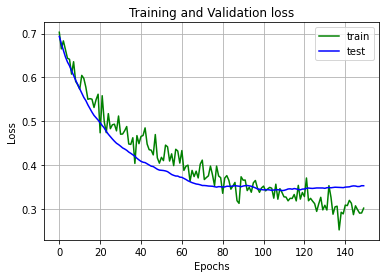

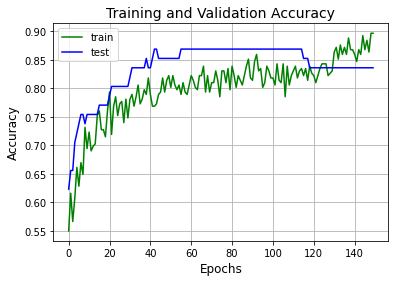

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7241 - accuracy: 0.5687 - val_loss: 0.7185 - val_accuracy: 0.5902
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6994 - accuracy: 0.5470 - val_loss: 0.7012 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6744 - accuracy: 0.5999 - val_loss: 0.6850 - val_accuracy: 0.5738
Epoch 4/150
8/8 [==============================] - 0s 19ms/step - loss: 0.6688 - accuracy: 0.5902 - val_loss: 0.6728 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6670 - accuracy: 0.6721 - val_loss: 0.6609 - val_accuracy: 0.6721
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7023 - accuracy: 0.5851 - val_loss: 0.6508 - val_accuracy: 0.7049
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6503 - accuracy: 0.6019 - val_loss: 0.6412 - val_accuracy: 0.7049
Ep

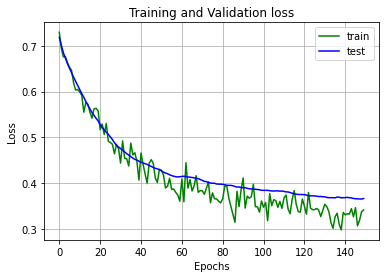

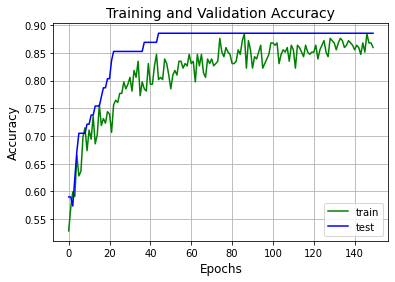

accuracy: 88.525%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7134 - accuracy: 0.5419 - val_loss: 0.6740 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6922 - accuracy: 0.5267 - val_loss: 0.6591 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7059 - accuracy: 0.5212 - val_loss: 0.6455 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6548 - accuracy: 0.5731 - val_loss: 0.6338 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6448 - accuracy: 0.6209 - val_loss: 0.6235 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6324 - accuracy: 0.6008 - val_loss: 0.6140 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6428 - accuracy: 0.6281 - val_loss: 0.6047 

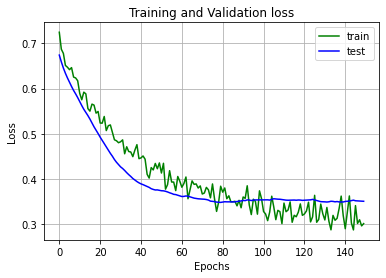

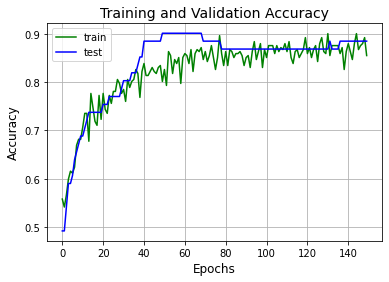

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 56ms/step - loss: 0.8335 - accuracy: 0.5398 - val_loss: 0.7595 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7497 - accuracy: 0.5378 - val_loss: 0.7103 - val_accuracy: 0.5902
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7473 - accuracy: 0.4955 - val_loss: 0.6680 - val_accuracy: 0.6066
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6530 - accuracy: 0.5952 - val_loss: 0.6320 - val_accuracy: 0.6393
Epoch 5/150
8/8 [==============================] - 0s 18ms/step - loss: 0.6417 - accuracy: 0.6319 - val_loss: 0.6028 - val_accuracy: 0.6721
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6748 - accuracy: 0.6009 - val_loss: 0.5810 - val_accuracy: 0.7541
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6646 - accuracy: 0.5987 - val_loss: 0.5635 - val_accuracy: 0.7705
Ep

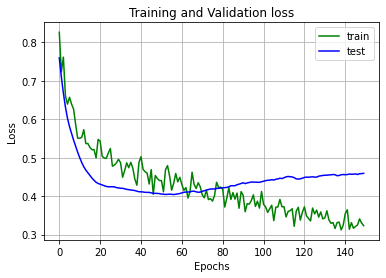

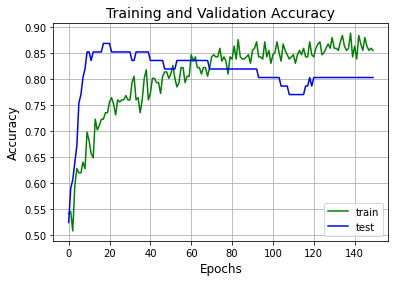

accuracy: 80.328%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.8640 - accuracy: 0.4735 - val_loss: 0.8678 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7899 - accuracy: 0.5451 - val_loss: 0.8377 - val_accuracy: 0.4754
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7689 - accuracy: 0.5429 - val_loss: 0.8098 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7467 - accuracy: 0.5289 - val_loss: 0.7848 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7368 - accuracy: 0.5327 - val_loss: 0.7625 - val_accuracy: 0.5246
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7387 - accuracy: 0.5272 - val_loss: 0.7432 - val_accuracy: 0.5410
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6938 - accuracy: 0.5529 - val_loss: 0.7252 - val_accuracy: 0.5574
Ep

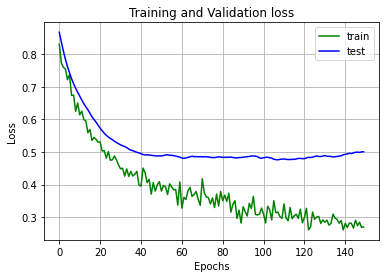

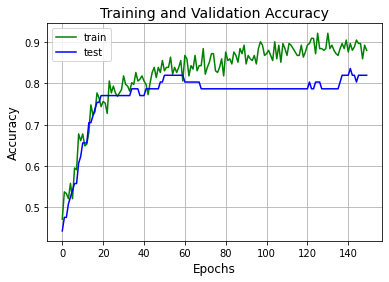

accuracy: 81.967%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7478 - accuracy: 0.4419 - val_loss: 0.7438 - val_accuracy: 0.4754
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7270 - accuracy: 0.4813 - val_loss: 0.7259 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7236 - accuracy: 0.5150 - val_loss: 0.7123 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7011 - accuracy: 0.4829 - val_loss: 0.7012 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6795 - accuracy: 0.5898 - val_loss: 0.6937 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6824 - accuracy: 0.6093 - val_loss: 0.6879 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6799 - accuracy: 0.6841 - val_loss: 0.6828 

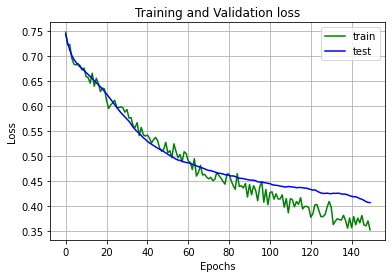

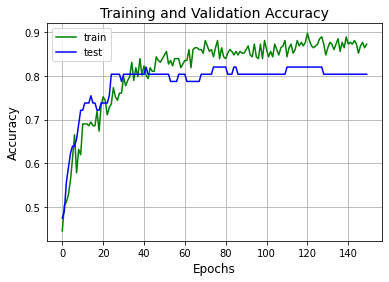

accuracy: 80.328%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.9765 - accuracy: 0.4028 - val_loss: 0.7918 - val_accuracy: 0.3770
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.9307 - accuracy: 0.4649 - val_loss: 0.7661 - val_accuracy: 0.4098
Epoch 3/150
8/8 [==============================] - 0s 17ms/step - loss: 0.7967 - accuracy: 0.5126 - val_loss: 0.7436 - val_accuracy: 0.4754
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8571 - accuracy: 0.4376 - val_loss: 0.7239 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7656 - accuracy: 0.5012 - val_loss: 0.7073 - val_accuracy: 0.5410
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7430 - accuracy: 0.4855 - val_loss: 0.6918 - val_accuracy: 0.5738
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7506 - accuracy: 0.5068 - val_loss: 0.6783 - val_accuracy: 0.5738
Ep

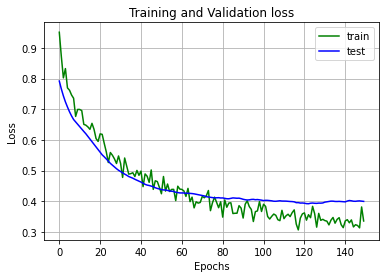

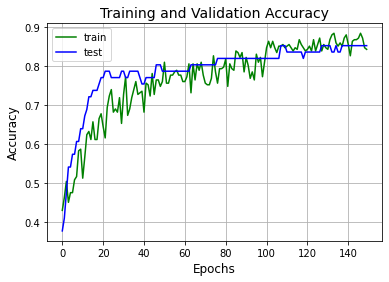

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 48ms/step - loss: 0.7715 - accuracy: 0.4500 - val_loss: 0.7834 - val_accuracy: 0.4098
Epoch 2/150
8/8 [==============================] - 0s 17ms/step - loss: 0.7485 - accuracy: 0.4233 - val_loss: 0.7647 - val_accuracy: 0.4262
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7137 - accuracy: 0.4620 - val_loss: 0.7489 - val_accuracy: 0.4098
Epoch 4/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7070 - accuracy: 0.4342 - val_loss: 0.7354 - val_accuracy: 0.4098
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.7238 - val_accuracy: 0.4426
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6808 - accuracy: 0.5318 - val_loss: 0.7140 - val_accuracy: 0.4426
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6891 - accuracy: 0.5031 - val_loss: 0.7052 - val_accuracy: 0.5082
Ep

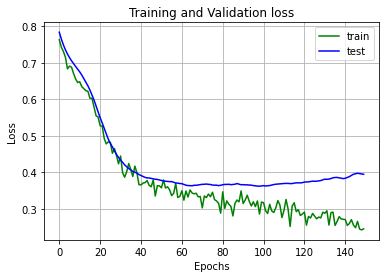

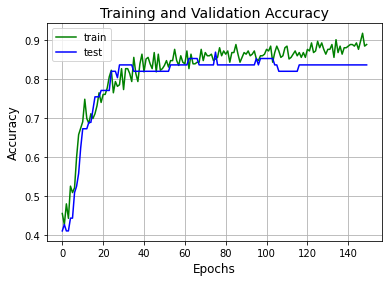

accuracy: 83.607%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.6693 - accuracy: 0.5982 - val_loss: 0.6330 - val_accuracy: 0.7213
Epoch 2/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6730 - accuracy: 0.5855 - val_loss: 0.6220 - val_accuracy: 0.7377
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6258 - accuracy: 0.6725 - val_loss: 0.6115 - val_accuracy: 0.7705
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6850 - accuracy: 0.6416 - val_loss: 0.6023 - val_accuracy: 0.7705
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6406 - accuracy: 0.6172 - val_loss: 0.5935 - val_accuracy: 0.7869
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6248 - accuracy: 0.6518 - val_loss: 0.5833 - val_accuracy: 0.7869
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6280 - accuracy: 0.6551 - val_loss: 0.5730 

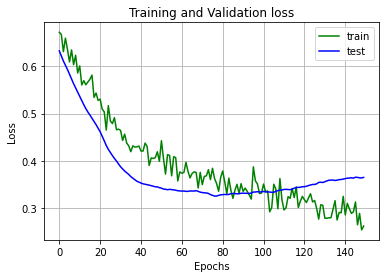

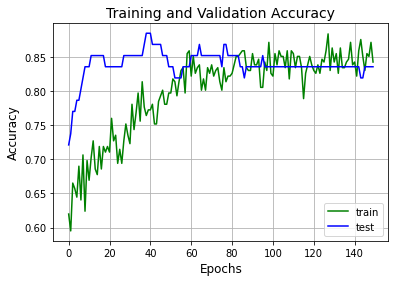

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 46ms/step - loss: 0.6953 - accuracy: 0.5335 - val_loss: 0.5621 - val_accuracy: 0.7049
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6405 - accuracy: 0.6417 - val_loss: 0.5572 - val_accuracy: 0.6885
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6512 - accuracy: 0.5835 - val_loss: 0.5517 - val_accuracy: 0.6885
Epoch 4/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6511 - accuracy: 0.6602 - val_loss: 0.5455 - val_accuracy: 0.6885
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6193 - accuracy: 0.5958 - val_loss: 0.5399 - val_accuracy: 0.7049
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.5926 - accuracy: 0.7390 - val_loss: 0.5338 - val_accuracy: 0.7049
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5846 - accuracy: 0.6830 - val_loss: 0.5273 - val_accuracy: 0.7049
Ep

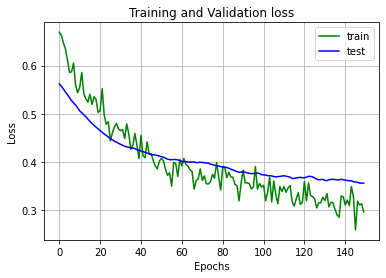

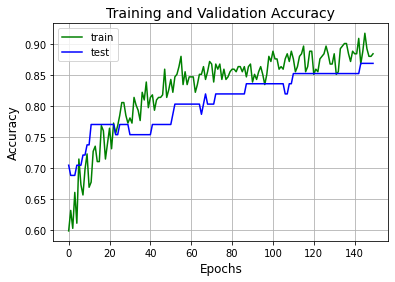

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 52ms/step - loss: 0.7216 - accuracy: 0.5555 - val_loss: 0.6531 - val_accuracy: 0.5410
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7411 - accuracy: 0.5407 - val_loss: 0.6358 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7260 - accuracy: 0.5493 - val_loss: 0.6224 - val_accuracy: 0.5902
Epoch 4/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6625 - accuracy: 0.6284 - val_loss: 0.6090 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6565 - accuracy: 0.5997 - val_loss: 0.5959 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6311 - accuracy: 0.6279 - val_loss: 0.5849 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6343 - accuracy: 0.5848 - val_loss: 0.5750 - val_accuracy: 0.6557
Ep

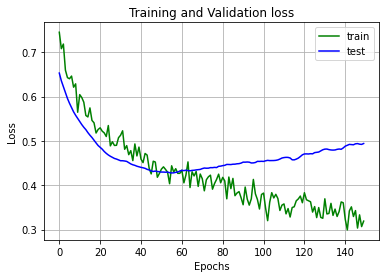

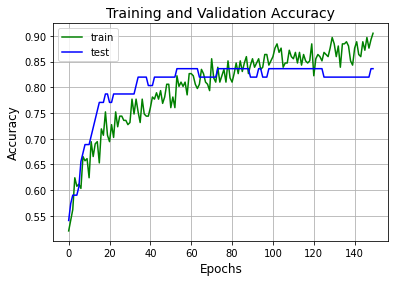

accuracy: 83.607%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.7237 - accuracy: 0.5357 - val_loss: 0.6035 - val_accuracy: 0.6721
Epoch 2/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5764 - val_loss: 0.5900 - val_accuracy: 0.6721
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7180 - accuracy: 0.5505 - val_loss: 0.5797 - val_accuracy: 0.7213
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6694 - accuracy: 0.6202 - val_loss: 0.5704 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6627 - accuracy: 0.6247 - val_loss: 0.5608 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6566 - accuracy: 0.6152 - val_loss: 0.5517 - val_accuracy: 0.7869
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6101 - accuracy: 0.6848 - val_loss: 0.5436 

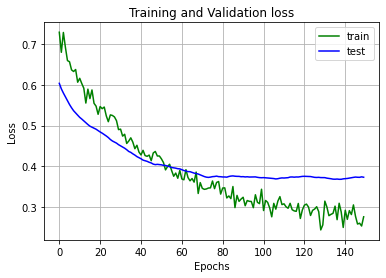

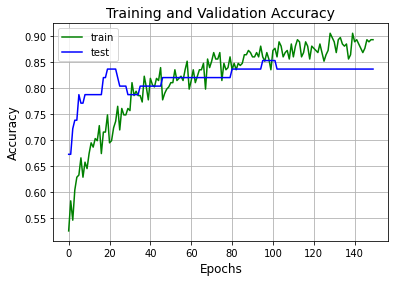

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 48ms/step - loss: 0.8588 - accuracy: 0.4235 - val_loss: 0.8925 - val_accuracy: 0.3443
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.8295 - accuracy: 0.4385 - val_loss: 0.8538 - val_accuracy: 0.3770
Epoch 3/150
8/8 [==============================] - 0s 18ms/step - loss: 0.8229 - accuracy: 0.4348 - val_loss: 0.8181 - val_accuracy: 0.3770
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7620 - accuracy: 0.4891 - val_loss: 0.7869 - val_accuracy: 0.4098
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7780 - accuracy: 0.4663 - val_loss: 0.7600 - val_accuracy: 0.4590
Epoch 6/150
8/8 [==============================] - 0s 18ms/step - loss: 0.7441 - accuracy: 0.4704 - val_loss: 0.7364 - val_accuracy: 0.5082
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6776 - accuracy: 0.5413 - val_loss: 0.7173 - val_accuracy: 0.5246
Ep

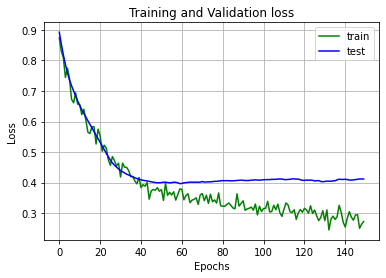

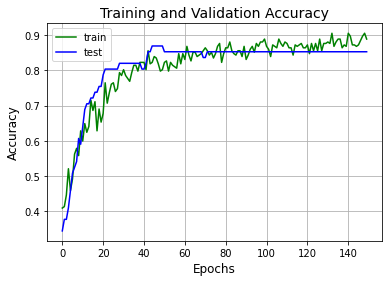

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.7820 - accuracy: 0.4735 - val_loss: 0.8445 - val_accuracy: 0.3443
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7743 - accuracy: 0.5051 - val_loss: 0.8149 - val_accuracy: 0.3607
Epoch 3/150
8/8 [==============================] - 0s 20ms/step - loss: 0.7368 - accuracy: 0.4931 - val_loss: 0.7901 - val_accuracy: 0.3770
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7467 - accuracy: 0.4915 - val_loss: 0.7682 - val_accuracy: 0.4098
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7322 - accuracy: 0.4722 - val_loss: 0.7497 - val_accuracy: 0.4262
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6645 - accuracy: 0.5455 - val_loss: 0.7348 - val_accuracy: 0.4426
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6633 - accuracy: 0.5627 - val_loss: 0.7221 - val_accuracy: 0.4918
Ep

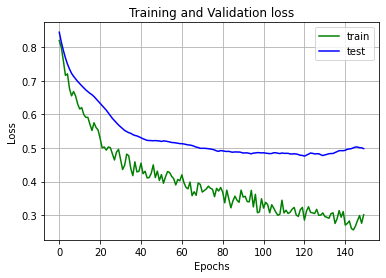

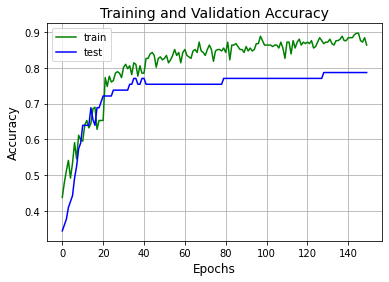

accuracy: 78.689%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.7269 - accuracy: 0.5157 - val_loss: 0.6939 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6880 - accuracy: 0.5357 - val_loss: 0.6762 - val_accuracy: 0.5082
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6647 - accuracy: 0.6122 - val_loss: 0.6603 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6473 - accuracy: 0.6387 - val_loss: 0.6473 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6111 - accuracy: 0.6527 - val_loss: 0.6347 - val_accuracy: 0.6066
Epoch 6/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6265 - accuracy: 0.6171 - val_loss: 0.6229 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6432 - accuracy: 0.5986 - val_loss: 0.6129 

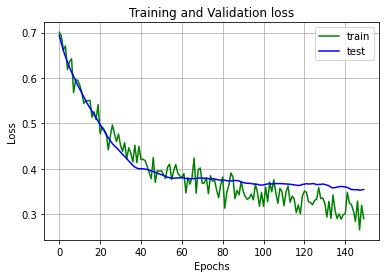

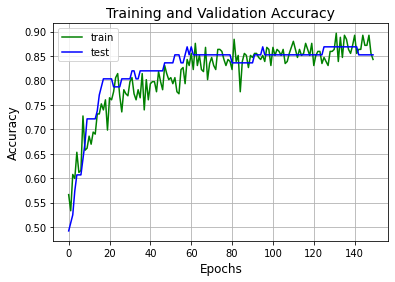

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 52ms/step - loss: 0.7362 - accuracy: 0.5411 - val_loss: 0.7210 - val_accuracy: 0.5082
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7595 - accuracy: 0.5085 - val_loss: 0.6923 - val_accuracy: 0.5738
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6808 - accuracy: 0.5953 - val_loss: 0.6690 - val_accuracy: 0.6393
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7231 - accuracy: 0.6129 - val_loss: 0.6482 - val_accuracy: 0.6557
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6398 - accuracy: 0.6256 - val_loss: 0.6323 - val_accuracy: 0.6721
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6623 - accuracy: 0.6289 - val_loss: 0.6180 - val_accuracy: 0.6885
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6485 - accuracy: 0.6231 - val_loss: 0.6039 - val_accuracy: 0.6885
Ep

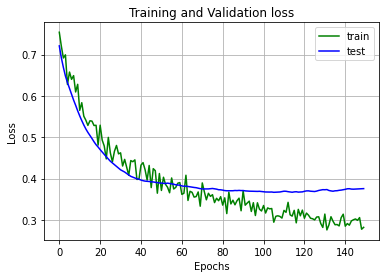

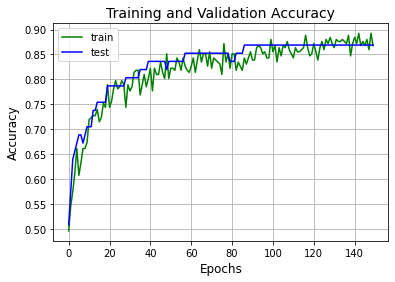

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 48ms/step - loss: 0.7257 - accuracy: 0.4874 - val_loss: 0.6869 - val_accuracy: 0.4918
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7092 - accuracy: 0.5019 - val_loss: 0.6776 - val_accuracy: 0.5246
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7073 - accuracy: 0.4884 - val_loss: 0.6699 - val_accuracy: 0.5410
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6987 - accuracy: 0.4812 - val_loss: 0.6618 - val_accuracy: 0.5410
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6606 - accuracy: 0.5512 - val_loss: 0.6537 - val_accuracy: 0.5738
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6680 - accuracy: 0.5476 - val_loss: 0.6466 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6499 - accuracy: 0.5592 - val_loss: 0.6401 - val_accuracy: 0.5902
Ep

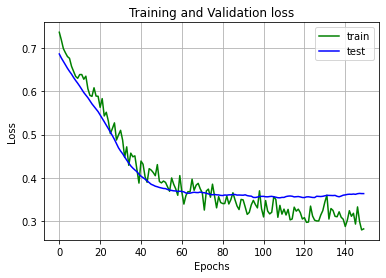

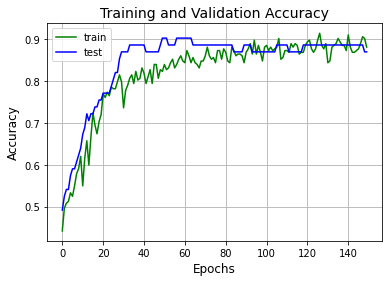

accuracy: 86.885%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.8210 - accuracy: 0.4820 - val_loss: 0.6950 - val_accuracy: 0.4590
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7995 - accuracy: 0.5139 - val_loss: 0.6699 - val_accuracy: 0.4590
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7622 - accuracy: 0.5181 - val_loss: 0.6498 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6956 - accuracy: 0.5500 - val_loss: 0.6330 - val_accuracy: 0.4754
Epoch 5/150
8/8 [==============================] - 0s 17ms/step - loss: 0.7013 - accuracy: 0.5554 - val_loss: 0.6173 - val_accuracy: 0.5574
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7006 - accuracy: 0.5199 - val_loss: 0.6040 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6433 - accuracy: 0.5744 - val_loss: 0.5943 

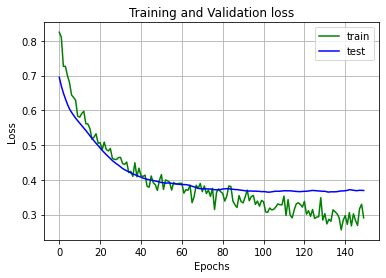

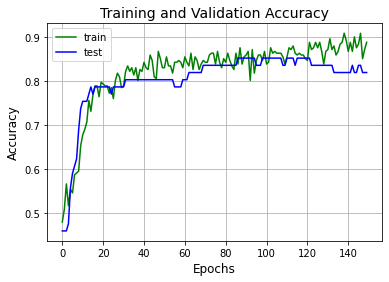

accuracy: 81.967%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7884 - accuracy: 0.5126 - val_loss: 0.6954 - val_accuracy: 0.4262
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7727 - accuracy: 0.5325 - val_loss: 0.6786 - val_accuracy: 0.4918
Epoch 3/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7501 - accuracy: 0.4872 - val_loss: 0.6663 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7358 - accuracy: 0.5512 - val_loss: 0.6549 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6540 - accuracy: 0.6295 - val_loss: 0.6444 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7056 - accuracy: 0.5193 - val_loss: 0.6358 - val_accuracy: 0.6721
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6688 - accuracy: 0.5657 - val_loss: 0.6278 - val_accuracy: 0.6885
Ep

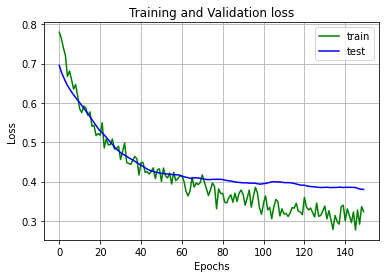

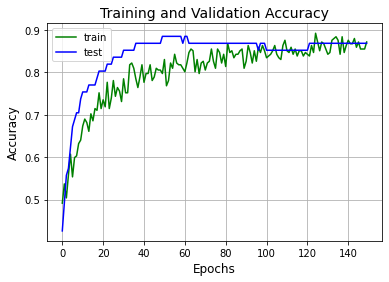

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 46ms/step - loss: 0.7411 - accuracy: 0.5912 - val_loss: 0.6671 - val_accuracy: 0.6393
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7104 - accuracy: 0.5926 - val_loss: 0.6348 - val_accuracy: 0.6557
Epoch 3/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6819 - accuracy: 0.6050 - val_loss: 0.6068 - val_accuracy: 0.6721
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6230 - accuracy: 0.6863 - val_loss: 0.5854 - val_accuracy: 0.6885
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6326 - accuracy: 0.6597 - val_loss: 0.5656 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6108 - accuracy: 0.6952 - val_loss: 0.5481 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 18ms/step - loss: 0.5865 - accuracy: 0.6511 - val_loss: 0.5340 - val_accuracy: 0.7541
Ep

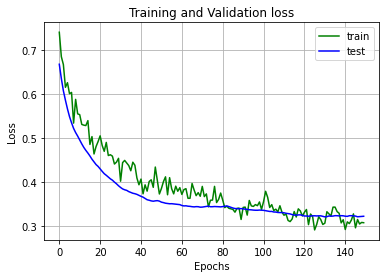

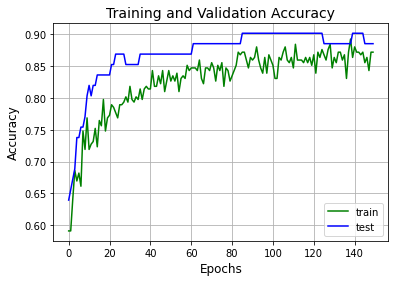

accuracy: 88.525%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 50ms/step - loss: 0.7751 - accuracy: 0.5280 - val_loss: 0.6826 - val_accuracy: 0.6230
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7698 - accuracy: 0.5335 - val_loss: 0.6624 - val_accuracy: 0.6557
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7406 - accuracy: 0.5834 - val_loss: 0.6462 - val_accuracy: 0.7049
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.7079 - accuracy: 0.5356 - val_loss: 0.6316 - val_accuracy: 0.7049
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6703 - accuracy: 0.5605 - val_loss: 0.6181 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6949 - accuracy: 0.6243 - val_loss: 0.6049 - val_accuracy: 0.8197
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6720 - accuracy: 0.5672 - val_loss: 0.5930 

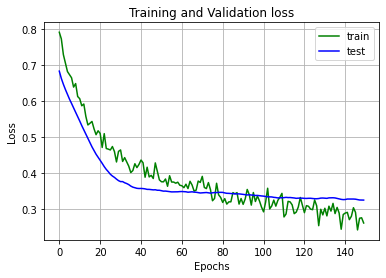

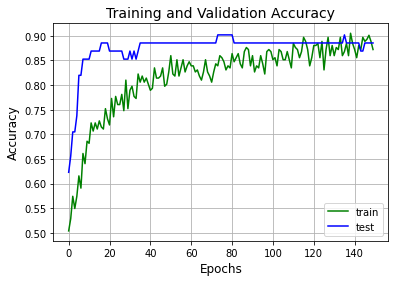

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 47ms/step - loss: 0.8775 - accuracy: 0.4812 - val_loss: 0.7552 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.8485 - accuracy: 0.4925 - val_loss: 0.7181 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7844 - accuracy: 0.5490 - val_loss: 0.6907 - val_accuracy: 0.6393
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7788 - accuracy: 0.5662 - val_loss: 0.6659 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6908 - accuracy: 0.5848 - val_loss: 0.6457 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7430 - accuracy: 0.5371 - val_loss: 0.6270 - val_accuracy: 0.6885
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7095 - accuracy: 0.5606 - val_loss: 0.6090 - val_accuracy: 0.6885
Ep

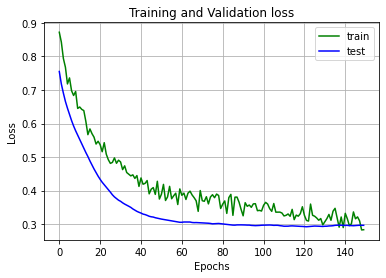

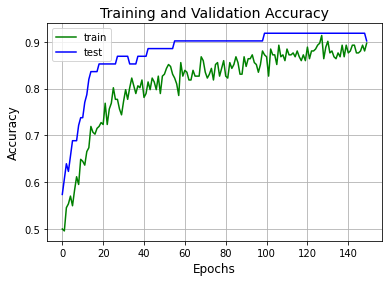

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 51ms/step - loss: 0.7354 - accuracy: 0.4522 - val_loss: 0.7123 - val_accuracy: 0.4754
Epoch 2/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7448 - accuracy: 0.4836 - val_loss: 0.6942 - val_accuracy: 0.5082
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7196 - accuracy: 0.4840 - val_loss: 0.6792 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6766 - accuracy: 0.5738 - val_loss: 0.6658 - val_accuracy: 0.5574
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6676 - accuracy: 0.4987 - val_loss: 0.6536 - val_accuracy: 0.5574
Epoch 6/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6635 - accuracy: 0.4951 - val_loss: 0.6434 - val_accuracy: 0.5902
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6557 - accuracy: 0.5662 - val_loss: 0.6338 - val_accuracy: 0.6230
Ep

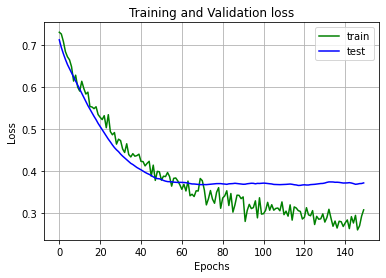

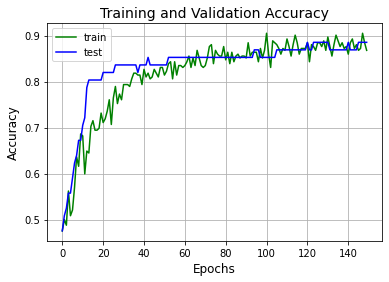

accuracy: 88.525%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.8906 - accuracy: 0.4448 - val_loss: 0.8774 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8323 - accuracy: 0.4943 - val_loss: 0.8374 - val_accuracy: 0.4426
Epoch 3/150
8/8 [==============================] - 0s 17ms/step - loss: 0.8482 - accuracy: 0.4832 - val_loss: 0.8045 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 17ms/step - loss: 0.7374 - accuracy: 0.5324 - val_loss: 0.7793 - val_accuracy: 0.5082
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7887 - accuracy: 0.4922 - val_loss: 0.7602 - val_accuracy: 0.5410
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.8096 - accuracy: 0.4942 - val_loss: 0.7439 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7263 - accuracy: 0.5812 - val_loss: 0.7309 

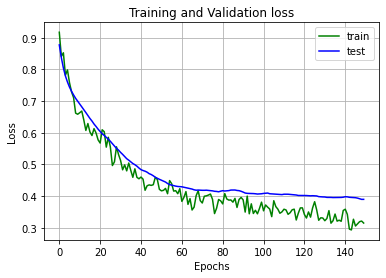

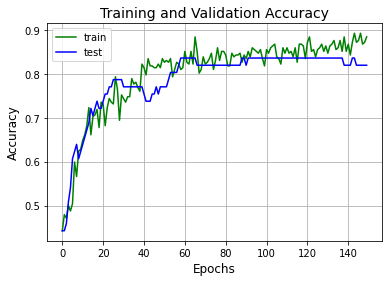

accuracy: 81.967%
Epoch 1/150
8/8 [==============================] - 1s 47ms/step - loss: 0.7156 - accuracy: 0.5083 - val_loss: 0.7129 - val_accuracy: 0.5574
Epoch 2/150
8/8 [==============================] - 0s 16ms/step - loss: 0.7174 - accuracy: 0.5602 - val_loss: 0.6926 - val_accuracy: 0.5574
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6483 - accuracy: 0.5661 - val_loss: 0.6759 - val_accuracy: 0.5574
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6612 - accuracy: 0.5593 - val_loss: 0.6610 - val_accuracy: 0.5902
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6784 - accuracy: 0.5398 - val_loss: 0.6486 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6438 - accuracy: 0.6013 - val_loss: 0.6386 - val_accuracy: 0.6557
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6481 - accuracy: 0.6359 - val_loss: 0.6296 - val_accuracy: 0.6885
Ep

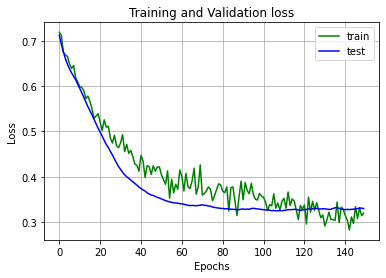

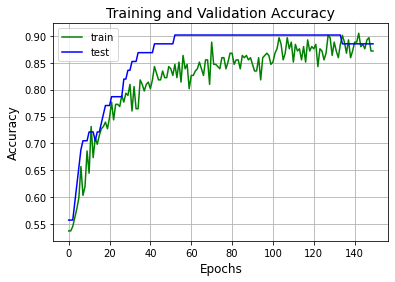

accuracy: 88.525%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7541 - accuracy: 0.4707 - val_loss: 0.7206 - val_accuracy: 0.5738
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7248 - accuracy: 0.4962 - val_loss: 0.7038 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7323 - accuracy: 0.5346 - val_loss: 0.6882 - val_accuracy: 0.6230
Epoch 4/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6683 - accuracy: 0.5535 - val_loss: 0.6753 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6670 - accuracy: 0.6192 - val_loss: 0.6634 - val_accuracy: 0.6557
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6564 - accuracy: 0.6470 - val_loss: 0.6520 - val_accuracy: 0.6393
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6312 - accuracy: 0.6971 - val_loss: 0.6396 - val_accuracy: 0.6557
Ep

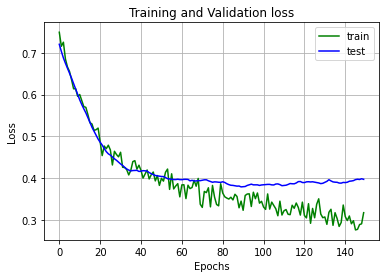

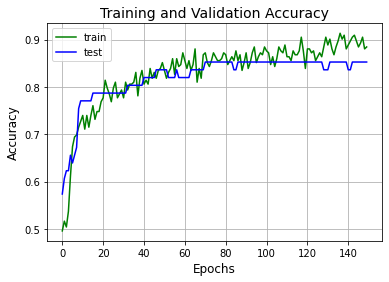

accuracy: 85.246%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.6797 - accuracy: 0.5527 - val_loss: 0.6624 - val_accuracy: 0.6885
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6875 - accuracy: 0.5988 - val_loss: 0.6434 - val_accuracy: 0.6885
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6644 - accuracy: 0.5983 - val_loss: 0.6275 - val_accuracy: 0.7049
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6567 - accuracy: 0.5852 - val_loss: 0.6137 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6749 - accuracy: 0.5639 - val_loss: 0.6023 - val_accuracy: 0.7377
Epoch 6/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6461 - accuracy: 0.6290 - val_loss: 0.5929 - val_accuracy: 0.7377
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6241 - accuracy: 0.6457 - val_loss: 0.5840 

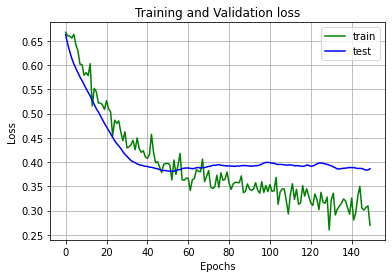

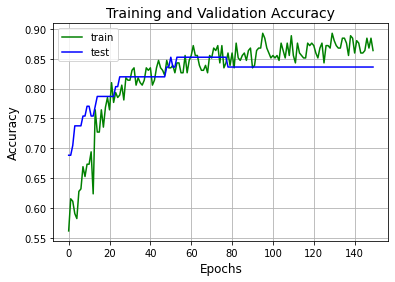

accuracy: 83.607%
Epoch 1/150
8/8 [==============================] - 1s 49ms/step - loss: 0.7887 - accuracy: 0.5878 - val_loss: 0.7942 - val_accuracy: 0.6066
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8185 - accuracy: 0.5170 - val_loss: 0.7597 - val_accuracy: 0.6066
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.7773 - accuracy: 0.5647 - val_loss: 0.7342 - val_accuracy: 0.5902
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7562 - accuracy: 0.5606 - val_loss: 0.7102 - val_accuracy: 0.6230
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6831 - accuracy: 0.5949 - val_loss: 0.6918 - val_accuracy: 0.6230
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6979 - accuracy: 0.5706 - val_loss: 0.6754 - val_accuracy: 0.6066
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6739 - accuracy: 0.6224 - val_loss: 0.6610 - val_accuracy: 0.6230
Ep

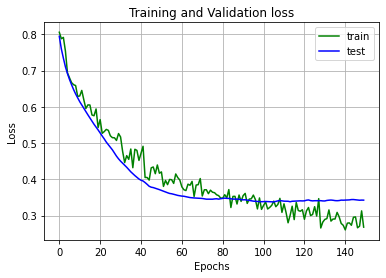

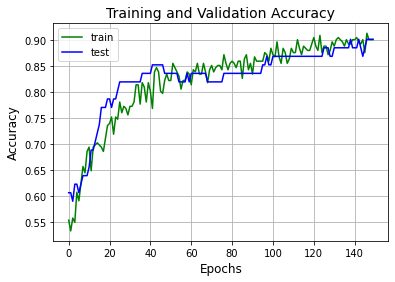

accuracy: 90.164%
Epoch 1/150
8/8 [==============================] - 1s 48ms/step - loss: 0.7660 - accuracy: 0.5618 - val_loss: 0.6171 - val_accuracy: 0.6885
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.7125 - accuracy: 0.5862 - val_loss: 0.6044 - val_accuracy: 0.7213
Epoch 3/150
8/8 [==============================] - 0s 16ms/step - loss: 0.6336 - accuracy: 0.6627 - val_loss: 0.5921 - val_accuracy: 0.7377
Epoch 4/150
8/8 [==============================] - 0s 19ms/step - loss: 0.6780 - accuracy: 0.6245 - val_loss: 0.5810 - val_accuracy: 0.7541
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.5942 - accuracy: 0.7067 - val_loss: 0.5700 - val_accuracy: 0.7705
Epoch 6/150
8/8 [==============================] - 0s 17ms/step - loss: 0.6010 - accuracy: 0.6591 - val_loss: 0.5593 - val_accuracy: 0.7705
Epoch 7/150
8/8 [==============================] - 0s 14ms/step - loss: 0.6294 - accuracy: 0.6472 - val_loss: 0.5495 - val_accuracy: 0.7705
Ep

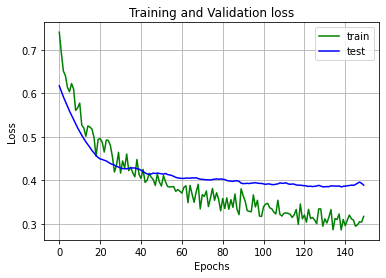

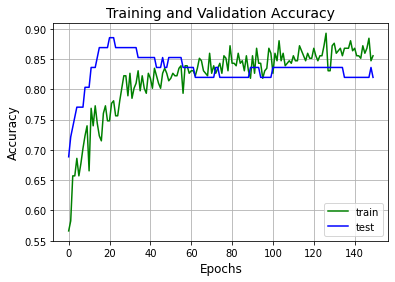

accuracy: 81.967%
Best Score: 85.969%
Best Parameters: {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.39, 'batch_size': 32}


In [ ]:
# Apply Random Search for parameter tuning
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize Keras Classifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Initialize parameters
# Min 2 splits, max 6 splits
# param_dict = {'batch_size': [16, 32],
#                'epochs': [100, 150],
#                'folds': [3, 4, 5],
#               'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)],
#               'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

param_dict = {'batch_size': [32],
              'epochs': [150],
              'folds': [3],
              'neurons': [(14, 6), (14, 8)],
              'dropout_rate': [0.39, 0.4, 0.41]}

# Initialize scoring method
scoring_dict = {'accuracy_score': make_scorer(accuracy_score),
           'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score)}

# Initialize RandomizedSearchCV object
rand = RandomizedSearchCV(estimator=model,
                          param_distributions=param_dict,
                          scoring=scoring_dict,
                          refit='accuracy_score')
rand_result = rand.fit(X_train, y_train)

# Show the results
print("Best Score: %.3f%%" % (rand_result.best_score_ * 100))
print("Best Parameters: %s" % rand_result.best_params_)


#### -- Random Search Results --

##### param_dict = {'batch_size': [16], 'epochs': [100], 'folds': [3, 4], 'neurons': [6, 8]}

Best Score: 77.7541%\
Best Parameters: {'neurons': 8, 'folds': 3, 'epochs': 100, 'batch_size': 16}

*Search time: Approx. 15 minutes

##### param_dict = {'batch_size': [16, 32], 'epochs': [150], 'folds': [3, 4], 'neurons': [10, 12]}

Best Score: 80.820%\
Best Parameters: {'neurons': 12, 'folds': 4, 'epochs': 150, 'batch_size': 32}

*Search time: Approx. 1.25 hours

##### param_dict = {'batch_size': [16, 32], 'epochs': [100, 150], 'folds': [3, 4, 5], 'neurons': [4, 6, 8, 10, 12]}
Best Score: 85.4372%\
Best Parameters: {'neurons': 12, 'folds': 3, 'epochs': 150, 'batch_size': 16}

*Search time: At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4, 5], 'neurons': [12], 'dropout_rate': [0.05, 0.1, 0.15]}
Best Score: 85.578%\
Best Parameters: {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

*Search time: At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3], 'neurons': [12], 'dropout_rate': [0.04, 0.05, 0.06]}
Best Score: 86.378%\
Best Parameters: {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

*Search time: Approx. 15 minutes

##### **With one Dropout layer:**

param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4],  'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)], 'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

- Best Score: 86.412%\
Best Parameters: {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

- Best Score: 87.645%\
Best Parameters: {'neurons': (14, 6), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

*Search time: Approx. 1.25 hours

##### **With two Dropout layers:**

param_dict = param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4], 'neurons': [(14, 6), (14, 8)], 'dropout_rate': [0.3, 0.4, 0.5]}

Best Score: 85.978%\
Best Parameters: {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.5, 'batch_size': 32}

*Search time: Approx. 1.5 hours